In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data partition
from math import ceil

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import umap
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [313]:
df=pd.read_sas('a2z_insurance.sas7bdat')
df.head()

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
0     1.0        1985.0     1982.0  b'2 - High School'    2177.0         1.0   
1     2.0        1981.0     1995.0  b'2 - High School'     677.0         4.0   
2     3.0        1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
3     4.0        1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
4     5.0        1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

   Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0       1.0      380.97        0.39     375.85          79.45      146.36   
1       1.0     -131.13        1.12      77.46         416.20      116.69   
2       0.0      504.67        0.28     206.15         224.50      124.58   
3       1.0      -16.99        0.99     182.48          43.35      311.17   
4       1.0       35.23        0.90     338.62          47.80      182.59   

   PremLife  PremWork  
0     47.01     16.89  
1    194.48    106.13  
2     86.35     99.02  
3     35.34     28.34  
4     18.78     41.45

In [314]:
CustID=df['CustID']
df.drop('CustID',axis=1,inplace=True)

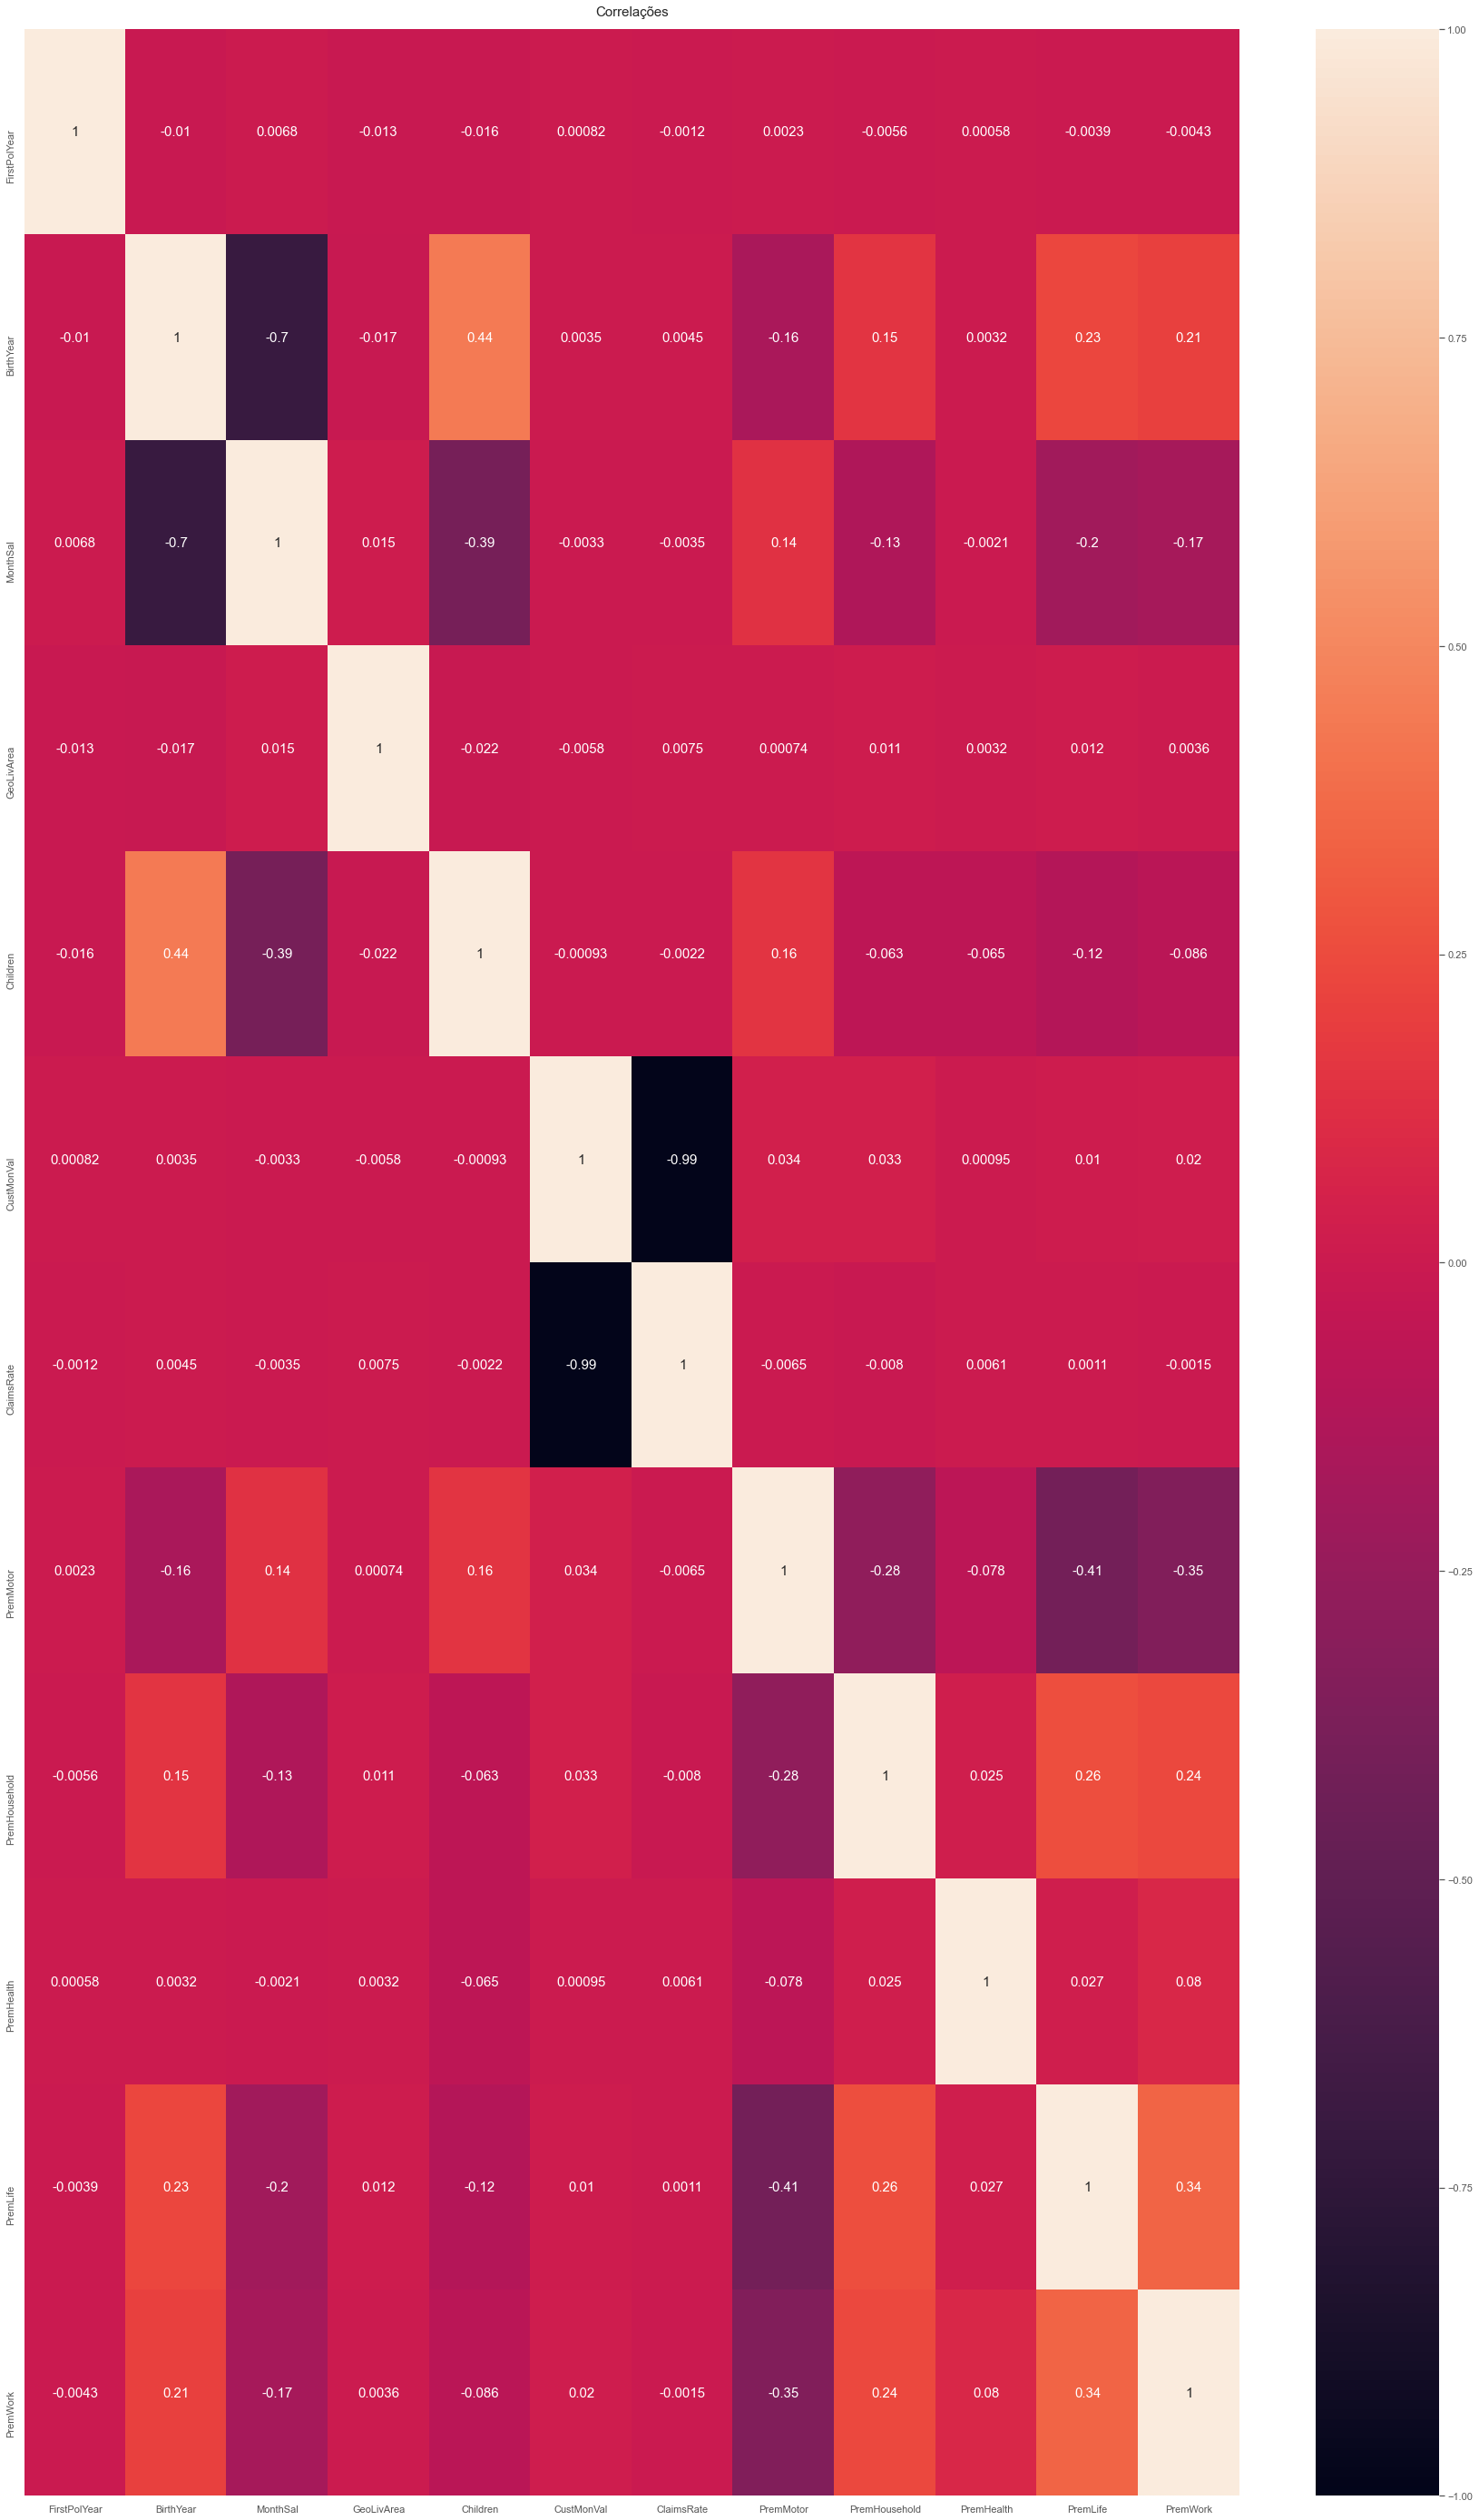

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 50))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 15})
heatmap.set_title('Correlações', fontdict={'fontsize':15}, pad=15);

In [316]:
df.shape

(10296, 13)

In [317]:
df.columns

Index(['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea',
       'Children', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork'],
      dtype='object')

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.0+ MB


In [319]:
df['GeoLivArea']=df['GeoLivArea'].astype(object)
df['Children']=df['Children'].astype(object)

In [320]:
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [321]:
metric_features=['FirstPolYear', 'BirthYear', 'MonthSal',
        'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
non_metric_features = ['EducDeg','GeoLivArea', 'Children']

In [322]:
df.describe() #Descrição numérica e categórica de todas as colunas

FirstPolYear     BirthYear      MonthSal     CustMonVal    ClaimsRate  \
count  10266.000000  10279.000000  10260.000000   10296.000000  10296.000000   
mean    1991.062634   1968.007783   2506.667057     177.892605      0.742772   
std      511.267913     19.709476   1157.449634    1945.811505      2.916964   
min     1974.000000   1028.000000    333.000000 -165680.420000      0.000000   
25%     1980.000000   1953.000000   1706.000000      -9.440000      0.390000   
50%     1986.000000   1968.000000   2501.500000     186.870000      0.720000   
75%     1992.000000   1983.000000   3290.250000     399.777500      0.980000   
max    53784.000000   2001.000000  55215.000000   11875.890000    256.200000   

          PremMotor  PremHousehold    PremHealth      PremLife      PremWork  
count  10262.000000   10296.000000  10253.000000  10192.000000  10210.000000  
mean     300.470252     210.431192    171.580833     41.855782     41.277514  
std      211.914997     352.595984    296.405976     47.480632     51.513572  
min       -4.110000     -75.000000     -2.110000     -7.000000    -12.000000  
25%      190.590000      49.450000    111.800000      9.890000     10.670000  
50%      298.610000     132.800000    162.810000     25.560000     25.670000  
75%      408.300000     290.050000    219.820000     57.790000     56.790000  
max    11604.420000   25048.800000  28272.000000    398.300000   1988.700000

In [323]:
df[df.isna().any(axis=1)]

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea  \
21           1977.0     1958.0  b'2 - High School'       NaN        3.0   
68           1983.0     1977.0  b'2 - High School'    1399.0        4.0   
138          1979.0     1976.0  b'2 - High School'    2538.0        2.0   
143          1996.0     1990.0      b'3 - BSc/MSc'       NaN        4.0   
184          1993.0     1984.0  b'2 - High School'    2419.0        4.0   
...             ...        ...                 ...       ...        ...   
10010           NaN     1947.0  b'2 - High School'    3959.0        2.0   
10057        1983.0     1980.0  b'2 - High School'    1569.0        4.0   
10142        1986.0     1985.0      b'3 - BSc/MSc'    1652.0        3.0   
10284        1980.0     1987.0      b'3 - BSc/MSc'    1504.0        4.0   
10285        1985.0     1948.0      b'3 - BSc/MSc'    3878.0        4.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
21         1.0      111.37        0.80     407.52         111.70      100.13   
68         1.0      476.65        0.33     330.73         186.70      211.15   
138        1.0      149.59        0.69     194.26         305.60         NaN   
143        1.0      -42.45        1.02     146.36         353.95      220.04   
184        1.0      -62.23        1.07        NaN         253.95      230.60   
...        ...         ...         ...        ...            ...         ...   
10010      NaN     -128.24        1.14     177.81         153.35      311.28   
10057      1.0      222.60        0.55     235.60         211.15         NaN   
10142      1.0       55.67        0.88     257.05          94.45      308.39   
10284      1.0       -1.55        0.96     390.63          29.45      179.70   
10285      1.0      -57.45        1.04     269.05         217.25      219.93   

       PremLife  PremWork  
21        24.67     30.34  
68          NaN     15.78  
138       37.34     17.67  
143      121.80     42.01  
184        5.89     43.12  
...         ...       ...  
10010     67.79     35.45  
10057     32.34     68.79  
10142       NaN     13.78  
10284     -6.00       NaN  
10285     32.45       NaN  

[309 rows x 13 columns]

In [324]:
df[df['PremMotor']<0]

FirstPolYear  BirthYear       EducDeg  MonthSal GeoLivArea Children  \
8951        1975.0     1995.0  b'1 - Basic'     449.0        4.0      1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
8951      -16.44        0.99      -4.11          369.5       94.13    220.93   

      PremWork  
8951    204.15

In [325]:
df[df['PremHousehold']<0]

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea  \
14           1983.0     1975.0  b'2 - High School'    1981.0        1.0   
30           1988.0     1975.0  b'2 - High School'    2148.0        4.0   
36           1982.0     1972.0  b'2 - High School'    2401.0        4.0   
44           1985.0     1990.0      b'3 - BSc/MSc'    1065.0        1.0   
48           1985.0     1974.0      b'3 - BSc/MSc'    2381.0        3.0   
...             ...        ...                 ...       ...        ...   
10250        1997.0     1957.0      b'3 - BSc/MSc'    2809.0        1.0   
10252        1978.0     1968.0      b'3 - BSc/MSc'    2499.0        1.0   
10269        1990.0     1976.0  b'2 - High School'    1858.0        1.0   
10270        1978.0     1968.0      b'3 - BSc/MSc'    2850.0        1.0   
10271        1978.0     1961.0      b'3 - BSc/MSc'    2740.0        1.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
14         1.0      -89.00        1.12     504.43         -70.00       72.79   
30         1.0      427.76        0.19     483.09         -15.00       92.24   
36         1.0        7.24        0.94     320.95         -25.55      145.25   
44         1.0     -128.68        1.19     111.80         -35.00      208.26   
48         1.0     -132.88        1.20     468.09         -45.55       92.24   
...        ...         ...         ...        ...            ...         ...   
10250      1.0      -40.11        1.03     362.18         -30.00      166.92   
10252      1.0      -84.00        1.11     532.10         -60.00       43.12   
10269      1.0     -207.91        1.34     175.59         -40.55      256.16   
10270      1.0      497.55        0.08     550.66         -15.00       25.45   
10271      1.0      431.10        0.19     460.31          -6.10       92.35   

       PremLife  PremWork  
14        10.89     16.89  
30         3.89     -5.11  
36        26.56     84.35  
44       224.71     44.23  
48         1.89     14.89  
...         ...       ...  
10250     49.12     14.89  
10252      3.89      2.89  
10269    142.36     11.00  
10270      4.00      1.89  
10271      1.89     16.67  

[1097 rows x 13 columns]

In [326]:
df[df['PremHealth']<0]

FirstPolYear  BirthYear     EducDeg  MonthSal GeoLivArea Children  \
1359        1991.0     1971.0  b'4 - PhD'    2694.0        4.0      1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
1359      487.89        0.06     580.11          -30.0       -2.11      -1.0   

      PremWork  
1359       1.0

In [327]:
df[df['PremLife']<0]

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea  \
15           1988.0     1979.0      b'3 - BSc/MSc'     974.0        4.0   
26           1978.0     1937.0          b'4 - PhD'    4281.0        3.0   
28           1995.0     1952.0      b'3 - BSc/MSc'    3639.0        4.0   
55           1995.0     1966.0      b'3 - BSc/MSc'    2885.0        2.0   
87           1997.0     1970.0      b'3 - BSc/MSc'    2423.0        2.0   
...             ...        ...                 ...       ...        ...   
10240        1976.0     1954.0  b'2 - High School'    2897.0        3.0   
10243        1988.0     1970.0          b'4 - PhD'    2278.0        1.0   
10248        1977.0     1967.0  b'2 - High School'    2211.0        4.0   
10276        1991.0     1983.0      b'3 - BSc/MSc'    1791.0        3.0   
10284        1980.0     1987.0      b'3 - BSc/MSc'    1504.0        4.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
15         1.0      290.06        0.53     318.06          93.90      247.49   
26         0.0      430.86        0.38     330.84         162.80      228.82   
28         0.0      264.17        0.50     301.28          18.90      258.05   
55         1.0      -15.22        0.98     559.66          44.45       17.56   
87         1.0      -46.00        1.03     581.33          55.00       17.67   
...        ...         ...         ...        ...            ...         ...   
10240      1.0      674.12        0.30     252.27         482.30      228.82   
10243      1.0      500.55        0.19     569.55          60.00       37.45   
10248      1.0      -10.32        0.97     484.87          18.90       82.57   
10276      1.0      281.06        0.54     308.06         122.80      215.82   
10284      1.0       -1.55        0.96     390.63          29.45      179.70   

       PremLife  PremWork  
15        -3.00     19.67  
26        -5.00     22.78  
28        -4.00     -0.11  
55        -1.11     10.89  
87        -6.00     -1.00  
...         ...       ...  
10240     -3.00     32.45  
10243     -4.00    -12.00  
10248     -2.00     -0.22  
10276     -2.00     27.56  
10284     -6.00       NaN  

[668 rows x 13 columns]

In [328]:
df['PremLife'].min()

-7.0

In [329]:
df[df['PremWork']<0]

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea  \
28           1995.0     1952.0      b'3 - BSc/MSc'    3639.0        4.0   
29           1980.0     1972.0      b'3 - BSc/MSc'    2660.0        3.0   
30           1988.0     1975.0  b'2 - High School'    2148.0        4.0   
51           1982.0     1966.0      b'3 - BSc/MSc'    3234.0        4.0   
64           1982.0     1973.0      b'3 - BSc/MSc'    2294.0        3.0   
...             ...        ...                 ...       ...        ...   
10243        1988.0     1970.0          b'4 - PhD'    2278.0        1.0   
10248        1977.0     1967.0  b'2 - High School'    2211.0        4.0   
10254        1994.0     1963.0      b'3 - BSc/MSc'    1940.0        1.0   
10255        1980.0     1945.0      b'3 - BSc/MSc'    3948.0        4.0   
10264        1976.0     1966.0      b'3 - BSc/MSc'    2343.0        1.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
28         0.0      264.17        0.50     301.28          18.90      258.05   
29         0.0        2.00        0.96     524.21          25.00       54.90   
30         1.0      427.76        0.19     483.09         -15.00       92.24   
51         1.0   -14714.08       25.36     557.44          20.00       29.56   
64         0.0     -124.32        1.19     452.53         -45.55      104.91   
...        ...         ...         ...        ...            ...         ...   
10243      1.0      500.55        0.19     569.55          60.00       37.45   
10248      1.0      -10.32        0.97     484.87          18.90       82.57   
10254      1.0      516.44        0.08     529.99          14.45       41.12   
10255      0.0      -28.22        1.01     423.19          13.35      128.47   
10264      1.0       -2.10        0.96     481.98          38.90       90.46   

       PremLife  PremWork  
28        -4.00     -0.11  
29         7.00     -5.00  
30         3.89     -5.11  
51         5.00     -9.00  
64        17.78     -4.11  
...         ...       ...  
10243     -4.00    -12.00  
10248     -2.00     -0.22  
10254      3.00     -3.00  
10255      4.78     -4.00  
10264     18.78     -8.00  

[925 rows x 13 columns]

In [330]:
df['PremWork'].min()

-12.0

In [331]:
a=-3
abs(a)

3

In [332]:
df['PremMotor']=df['PremMotor']+abs(df['PremMotor'].min())
df['PremHousehold']=df['PremHousehold']+abs(df['PremHousehold'].min())
df['PremHealth']=df['PremHealth']+abs(df['PremHealth'].min())
df['PremLife']=df['PremLife']+abs(df['PremLife'].min())
df['PremWork']=df['PremWork']+abs(df['PremWork'].min())

In [333]:
PremZero=df[['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']] == 0

In [334]:
PremZero

PremMotor  PremHousehold  PremHealth  PremLife  PremWork
0          False          False       False     False     False
1          False          False       False     False     False
2          False          False       False     False     False
3          False          False       False     False     False
4          False          False       False     False     False
...          ...            ...         ...       ...       ...
10291      False          False       False     False     False
10292      False          False       False     False     False
10293      False          False       False     False     False
10294      False          False       False     False     False
10295      False          False       False     False     False

[10296 rows x 5 columns]

In [335]:
PremZero.value_counts()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork
False      False          False       False     False       10178
                                      True      False          65
                                      False     True           33
           True           False       False     False          17
           False          True        False     False           1
           True           False       False     True            1
True       False          False       False     False           1
dtype: int64

In [336]:
# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(df )#diag_kind="hist"

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship Variables", fontsize=20)

# plt.show()

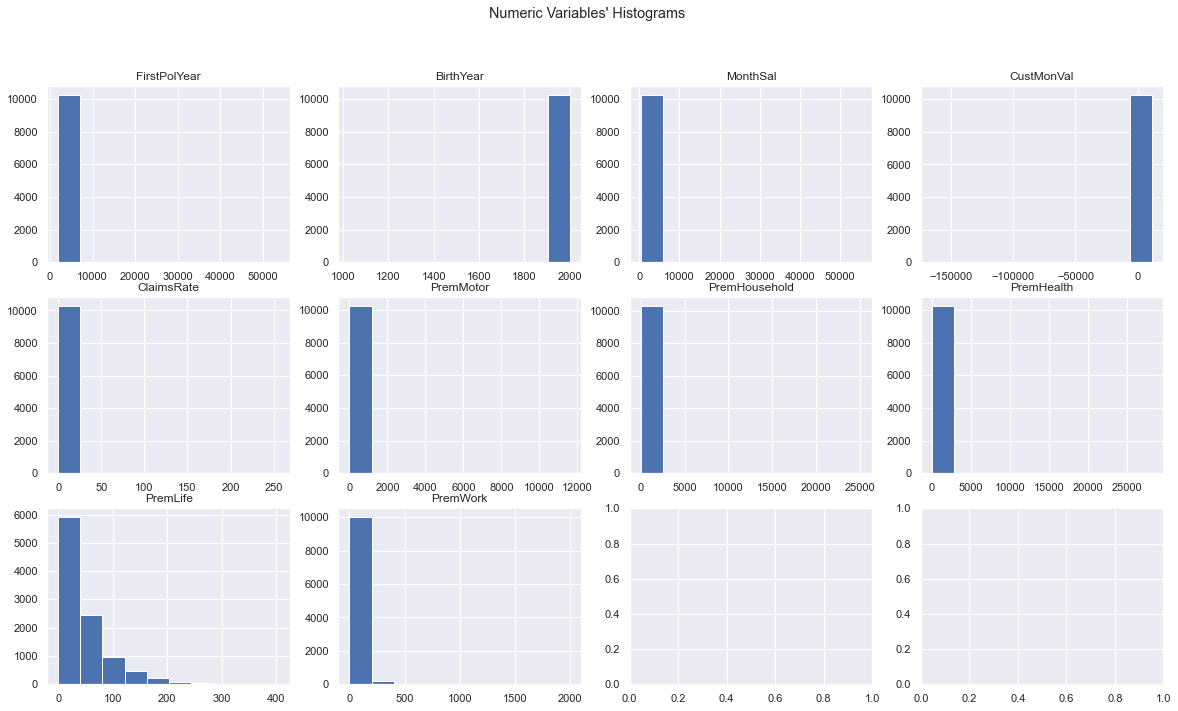

In [337]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE (extra: set each axis title as the feature name)
    ax.hist(df[feat])
    ax.set_title(feat)

    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

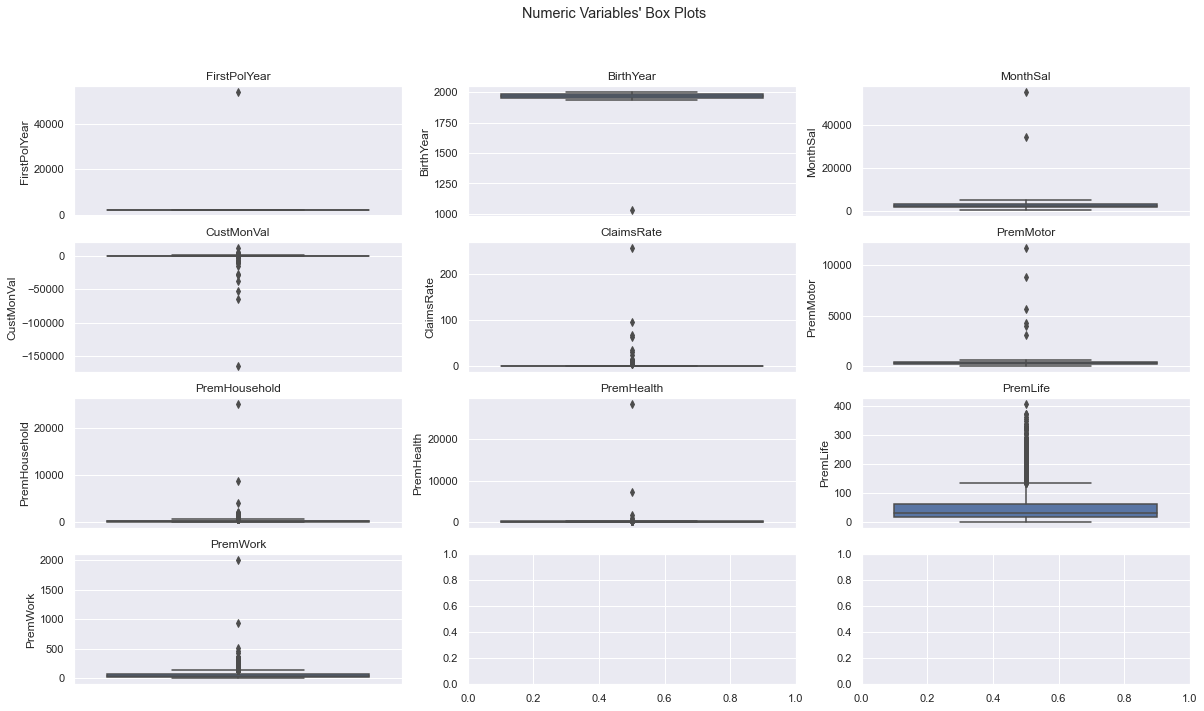

In [338]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    # CODE HERE
    sns.boxplot(y=df[feat] , ax=ax)
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

Create a df without rows with NaN values

In [339]:
# print(df)
is_NaN = df. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df[row_has_NaN]
df_noNaN=df[~row_has_NaN]
print(len(rows_with_NaN),len(rows_with_NaN)/len(df)*100)
print(len(df_noNaN))

309 3.0011655011655014
9987


## Z-Score

In [340]:
count=0
for feature in df[metric_features].columns:
    zscore=pd.Series(df[feature] - df[feature].mean() ) / df[feature].std()
#     print(zscore[zscore>3])
    count+=(len(zscore[zscore>3])+len(zscore[zscore<-3]))
    print(feature,len(zscore[zscore>3])+len(zscore[zscore<-3]),(len(zscore[zscore>3])+len(zscore[zscore<-3]))/len(df)*100)
print()
print(count/len(df)*100)

FirstPolYear 1 0.009712509712509712
BirthYear 1 0.009712509712509712
MonthSal 2 0.019425019425019424
CustMonVal 13 0.12626262626262627
ClaimsRate 12 0.11655011655011654
PremMotor 6 0.05827505827505827
PremHousehold 36 0.34965034965034963
PremHealth 3 0.029137529137529136
PremLife 210 2.0396270396270397
PremWork 159 1.5442890442890442

4.302641802641802


In [341]:
zscore

0       -0.473419
1        1.258940
2        1.120918
3       -0.251148
4        0.003348
           ...   
10291   -0.514379
10292    1.239527
10293   -0.706368
10294    1.390556
10295   -0.551069
Name: PremWork, Length: 10296, dtype: float64

In [342]:
count=0
for feature in df_noNaN[metric_features].columns:
    zscore=pd.Series(df_noNaN[feature] - df_noNaN[feature].mean() ) / df_noNaN[feature].std()
    df_noNaN["zscore"]=(df_noNaN[feature] - df_noNaN[feature].mean() ) / df_noNaN[feature].std()
#     print(zscore[zscore>3])
    count+=(len(zscore[zscore>3])+len(zscore[zscore<-3]))
    df_noNaN["zscore_outliers"]=df_noNaN["zscore"].apply(lambda x: -1 if ((x>3) & (x<-3)) else 1)
    #print(feature,len(zscore[zscore>3])+len(zscore[zscore<-3]),(len(zscore[zscore>3])+len(zscore[zscore<-3]))/len(df)*100)
print()
print(count/len(df_noNaN)*100)


4.345649344147392


## LOF

In [343]:
##To review

# import the algorithm
from sklearn.neighbors import LocalOutlierFactor
#initialise the algorithm
lof = LocalOutlierFactor(n_neighbors = 20)
#fit it to the training data, since we don't use it for novelty than
# this is fine
y_pred = lof.fit_predict(df_noNaN[metric_features])
#extract the predictions as strings
df_noNaN["lof_outliers"] = y_pred.astype(str)
#print the number of outliers relative to non-outliers
print(df_noNaN["lof_outliers"].value_counts())
#extract the outlier scores
# df_noNaN["lof_scores"] = lof.negative_outlier_factor_
#print(len(df_noNaN[df_noNaN["iso_forest_outliers"]=="-1"])/len(df)*100)

1     9894
-1      93
Name: lof_outliers, dtype: int64


In [344]:
len(df.columns)

13

## Isolation Forest

In [345]:
from sklearn.ensemble import IsolationForest#create the method instance
isf = IsolationForest(n_estimators = 100, random_state = 42, contamination = 0.02)
#use fit_predict on the data as we are using all the data
preds = isf.fit_predict(df_noNaN[metric_features])
#extract outliers from the data
df_noNaN["iso_forest_outliers"] = preds
df_noNaN["iso_forest_outliers"] = df_noNaN["iso_forest_outliers"].astype(str)
#extract the scores from the data in terms of strength of outlier
df_noNaN["iso_forest_scores"] = isf.decision_function(df_noNaN[metric_features])#print how many outliers the data suggests
print(df_noNaN["iso_forest_outliers"].value_counts())# Out:
print(len(df_noNaN[df_noNaN["iso_forest_outliers"]=="-1"])/len(df)*100)

1     9787
-1     200
Name: iso_forest_outliers, dtype: int64
1.9425019425019423


In [346]:
# df_withoutOutliers=df.iloc[df_noNaN[df_noNaN['iso_forest_outliers']=="1"].index]
# df_withoutOutliers

In [347]:
# # Pairwise Relationship of Numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(df_noNaN, diag_kind="hist",hue="iso_forest_outliers")

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# plt.show()

In [348]:
# df_noNaN.head(2)

## DBScan Outlier Detection

In [349]:
#import the algorithm
from sklearn.cluster import DBSCAN
#initiate the algorithm
#set the distance to 20, and min_samples as 5
outlier_detection = DBSCAN(eps = 40, metric = "euclidean", min_samples = 10, n_jobs = -1)
#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(df_noNaN[metric_features])
#extract the labels from the algorithm
df_noNaN["dbscan_outliers"] = clusters
#label all others as inliers 
df_noNaN["dbscan_outliers"] = df_noNaN["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))
#print the vaue counts
print(df_noNaN["dbscan_outliers"].value_counts())

-1    9987
Name: dbscan_outliers, dtype: int64


### NOTE: THERE ARE NO CLEAR CLUSTERS , THE DATA IS VERY SPARSE 

In [350]:
df_noNaN.head(2)

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea Children  \
0        1985.0     1982.0  b'2 - High School'    2177.0        1.0      1.0   
1        1981.0     1995.0  b'2 - High School'     677.0        4.0      1.0   

   CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
0      380.97        0.39     379.96         154.45      148.47     54.01   
1     -131.13        1.12      81.57         491.20      118.80    201.48   

   PremWork    zscore  zscore_outliers lof_outliers iso_forest_outliers  \
0     28.89 -0.475733                1            1                   1   
1    118.13  1.249263                1            1                   1   

   iso_forest_scores dbscan_outliers  
0           0.161645              -1  
1           0.052776              -1

In [351]:
#extract the sum of the outlier count
df_noNaN['outliers_sum'] = (df_noNaN['iso_forest_outliers'].astype(int)+
                           df_noNaN['lof_outliers'].astype(int)+
                           df_noNaN['zscore_outliers'].astype(int))
#print the value counts for eacdf_noNaNh scale
print(df_noNaN["outliers_sum"].value_counts())

 3    9720
 1     241
-1      26
Name: outliers_sum, dtype: int64


#### WITH ALL THESE 3 METHODS , THERE WERE 29 OBSERVATIONS HAVE CONSIDERES AS OUTLIERS FOR AT LEAST 2 METHODS

In [352]:
df_noNaN[['iso_forest_outliers','lof_outliers','zscore_outliers','outliers_sum']].loc[df_noNaN['outliers_sum']==-1]

iso_forest_outliers lof_outliers  zscore_outliers  outliers_sum
51                     -1           -1                1            -1
112                    -1           -1                1            -1
135                    -1           -1                1            -1
655                    -1           -1                1            -1
675                    -1           -1                1            -1
793                    -1           -1                1            -1
1069                   -1           -1                1            -1
1745                   -1           -1                1            -1
2323                   -1           -1                1            -1
2887                   -1           -1                1            -1
4373                   -1           -1                1            -1
5084                   -1           -1                1            -1
5211                   -1           -1                1            -1
5293                   -1           -1                1            -1
6270                   -1           -1                1            -1
6742                   -1           -1                1            -1
7961                   -1           -1                1            -1
8366                   -1           -1                1            -1
8425                   -1           -1                1            -1
8667                   -1           -1                1            -1
8741                   -1           -1                1            -1
9149                   -1           -1                1            -1
9235                   -1           -1                1            -1
9390                   -1           -1                1            -1
9954                   -1           -1                1            -1
10292                  -1           -1                1            -1

In [353]:
outliers_index=df_noNaN[['iso_forest_outliers','lof_outliers','zscore_outliers','outliers_sum']].loc[df_noNaN['outliers_sum']==-1].index
outliers_index=np.array(outliers_index)

In [354]:
df_outliers=df.iloc[outliers_index]
df_outliers

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea  \
51           1982.0     1966.0      b'3 - BSc/MSc'    3234.0        4.0   
112          1997.0     1979.0          b'4 - PhD'    2354.0        1.0   
135          1997.0     1988.0      b'3 - BSc/MSc'    2176.0        4.0   
655          1974.0     1963.0      b'3 - BSc/MSc'    3279.0        3.0   
675          1994.0     1937.0  b'2 - High School'    4435.0        1.0   
793          1980.0     1983.0      b'3 - BSc/MSc'    1370.0        3.0   
1069         1997.0     1998.0        b'1 - Basic'     566.0        4.0   
1745         1980.0     1999.0        b'1 - Basic'     376.0        4.0   
2323         1984.0     1997.0        b'1 - Basic'     782.0        3.0   
2887         1989.0     1950.0  b'2 - High School'    3175.0        4.0   
4373         1976.0     1993.0        b'1 - Basic'    1133.0        4.0   
5084         1994.0     1959.0  b'2 - High School'    3330.0        3.0   
5211         1981.0     1943.0  b'2 - High School'    4135.0        3.0   
5293         1989.0     1963.0      b'3 - BSc/MSc'    3564.0        3.0   
6270         1995.0     1936.0        b'1 - Basic'    4119.0        4.0   
6742         1987.0     1997.0        b'1 - Basic'    1482.0        1.0   
7961         1995.0     1942.0      b'3 - BSc/MSc'    4002.0        3.0   
8366         1981.0     1995.0        b'1 - Basic'    1094.0        1.0   
8425         1976.0     1996.0        b'1 - Basic'     427.0        3.0   
8667         1981.0     1997.0        b'1 - Basic'    1421.0        1.0   
8741         1993.0     1946.0        b'1 - Basic'    3726.0        3.0   
9149         1985.0     1994.0  b'2 - High School'     987.0        3.0   
9235         1997.0     1998.0        b'1 - Basic'     566.0        4.0   
9390         1992.0     1999.0        b'1 - Basic'     540.0        3.0   
9954         1974.0     1998.0        b'1 - Basic'     768.0        4.0   
10292        1977.0     1952.0        b'1 - Basic'    2431.0        3.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
51         1.0   -14714.08       25.36     561.55          95.00       31.67   
112        1.0    -8719.04       15.65     522.43          79.45       58.01   
135        1.0   -10198.91       14.80     301.72         237.80      145.47   
655        1.0   -64891.00       96.00     414.41         192.25       97.46   
675        0.0   -52382.76       63.00     201.59         355.60      279.05   
793        1.0    -7851.17       13.90     131.69         123.35      400.52   
1069       1.0      -71.01        1.02      18.67        1852.55       51.34   
1745       1.0      797.92        0.57      32.45        1298.00      109.02   
2323       1.0     2054.07        0.03      43.23        2032.60       49.34   
2887       0.0     1191.34        0.20     113.02        1223.55      146.36   
4373       1.0     1801.45        0.10      57.12        1901.45       70.79   
5084       0.0     2314.21        0.14     354.62         276.70      127.91   
5211       0.0      130.14        0.99    8748.72         176.70     1769.11   
5293       1.0    11875.89        0.09   11608.53         123.90     1047.63   
6270       0.0     -376.29        1.43      65.90         378.95      105.24   
6742       0.0     1634.97        0.17      36.67        1823.10       53.12   
7961       0.0     1457.99        0.83     435.97         182.80     7324.59   
8366       1.0     1891.04        0.09      17.78        1993.15       54.01   
8425       1.0      -61.34        1.02      20.78        2298.75       39.56   
8667       0.0     1997.60        0.05      34.45        1999.25       39.34   
8741       0.0     -163.25        1.09      63.12        1269.10      117.02   
9149       1.0      804.05        0.97      30.45         904.05    28274.11   
9235       1.0     1691.43        0.15      18.67        1852.55       51.34   
9390       0.0     -490.20        1.55      24.89         365

In [355]:
df_noNaN_wihthout_outliers = df_noNaN[~df_noNaN.index.isin(outliers_index)]

In [356]:
df_num=df[['FirstPolYear', 'BirthYear', 'MonthSal',
        'CustMonVal', 'ClaimsRate', 'PremMotor',
       'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]

In [357]:
df_cat=df[['EducDeg','GeoLivArea', 'Children']]

## FillNA com KNN Inputer

In [358]:
df_toFill=pd.concat([df_noNaN_wihthout_outliers,rows_with_NaN]).sort_index()
df_toFill

FirstPolYear  BirthYear             EducDeg  MonthSal GeoLivArea  \
0            1985.0     1982.0  b'2 - High School'    2177.0        1.0   
1            1981.0     1995.0  b'2 - High School'     677.0        4.0   
2            1991.0     1970.0        b'1 - Basic'    2277.0        3.0   
3            1990.0     1981.0      b'3 - BSc/MSc'    1099.0        4.0   
4            1986.0     1973.0      b'3 - BSc/MSc'    1763.0        4.0   
...             ...        ...                 ...       ...        ...   
10290        1994.0     1999.0        b'1 - Basic'     626.0        3.0   
10291        1984.0     1949.0          b'4 - PhD'    3188.0        2.0   
10293        1994.0     1976.0      b'3 - BSc/MSc'    2918.0        1.0   
10294        1981.0     1977.0        b'1 - Basic'    1971.0        2.0   
10295        1990.0     1981.0          b'4 - PhD'    2815.0        1.0   

      Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0          1.0      380.97        0.39     379.96         154.45      148.47   
1          1.0     -131.13        1.12      81.57         491.20      118.80   
2          0.0      504.67        0.28     210.26         299.50      126.69   
3          1.0      -16.99        0.99     186.59         118.35      313.28   
4          1.0       35.23        0.90     342.73         122.80      184.70   
...        ...         ...         ...        ...            ...         ...   
10290      1.0      176.26        0.85      11.00         953.50      105.24   
10291      0.0       -0.11        0.96     397.85         124.45      175.92   
10293      1.0      524.10        0.21     407.74         207.80      144.36   
10294      1.0      250.05        0.65     192.70         286.15      200.48   
10295      1.0      463.75        0.27     418.19         169.45      143.36   

       PremLife  PremWork    zscore  zscore_outliers lof_outliers  \
0         54.01     28.89 -0.475733              1.0            1   
1        201.48    118.13  1.249263              1.0            1   
2         93.35    111.02  1.111828              1.0            1   
3         42.34     40.34 -0.254406              1.0            1   
4         25.78     53.45 -0.000992              1.0            1   
...         ...       ...       ...              ...          ...   
10290    120.02    213.26  3.088111              1.0            1   
10291     16.78     26.78 -0.516518              1.0            1   
10293     19.67     16.89 -0.707691              1.0            1   
10294     70.90    124.91  1.380319              1.0            1   
10295     13.89     24.89 -0.553052              1.0            1   

      iso_forest_outliers  iso_forest_scores dbscan_outliers  outliers_sum  
0                       1           0.161645              -1           3.0  
1                       1           0.052776              -1           3.0  
2                       1           0.129481              -1           3.0  
3                       1           0.129484              -1           3.0  
4                       1           0.177110              -1           3.0  
...                   ...                ...             ...           ...  
10290                  -1          -0.005593              -1           1.0  
10291                   1           0.172957              -1           3.0  
10293                   1           0.137121              -1           3.0  
10294                   1           0.144449              -1           3.0  
10295                   1           0.151740              -1           3.0  

[10270 rows x 20 columns]

In [359]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [360]:
from sklearn.impute import KNNImputer
imputer = IterativeImputer(ExtraTreesRegressor(n_estimators=10, random_state=0)).fit(df_toFill[metric_features])
filled_df = imputer.transform(df_toFill[metric_features])

In [361]:
filled_df=pd.DataFrame(filled_df, index=df_toFill[metric_features].index , columns=df_toFill[metric_features].columns)
filled_df

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0            1985.0     1982.0    2177.0      380.97        0.39     379.96   
1            1981.0     1995.0     677.0     -131.13        1.12      81.57   
2            1991.0     1970.0    2277.0      504.67        0.28     210.26   
3            1990.0     1981.0    1099.0      -16.99        0.99     186.59   
4            1986.0     1973.0    1763.0       35.23        0.90     342.73   
...             ...        ...       ...         ...         ...        ...   
10290        1994.0     1999.0     626.0      176.26        0.85      11.00   
10291        1984.0     1949.0    3188.0       -0.11        0.96     397.85   
10293        1994.0     1976.0    2918.0      524.10        0.21     407.74   
10294        1981.0     1977.0    1971.0      250.05        0.65     192.70   
10295        1990.0     1981.0    2815.0      463.75        0.27     418.19   

       PremHousehold  PremHealth  PremLife  PremWork  
0             154.45      148.47     54.01     28.89  
1             491.20      118.80    201.48    118.13  
2             299.50      126.69     93.35    111.02  
3             118.35      313.28     42.34     40.34  
4             122.80      184.70     25.78     53.45  
...              ...         ...       ...       ...  
10290         953.50      105.24    120.02    213.26  
10291         124.45      175.92     16.78     26.78  
10293         207.80      144.36     19.67     16.89  
10294         286.15      200.48     70.90    124.91  
10295         169.45      143.36     13.89     24.89  

[10270 rows x 10 columns]

In [362]:
filled_df=pd.concat([filled_df,df_toFill[['EducDeg','GeoLivArea', 'Children']]],axis=1)
filled_df

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0            1985.0     1982.0    2177.0      380.97        0.39     379.96   
1            1981.0     1995.0     677.0     -131.13        1.12      81.57   
2            1991.0     1970.0    2277.0      504.67        0.28     210.26   
3            1990.0     1981.0    1099.0      -16.99        0.99     186.59   
4            1986.0     1973.0    1763.0       35.23        0.90     342.73   
...             ...        ...       ...         ...         ...        ...   
10290        1994.0     1999.0     626.0      176.26        0.85      11.00   
10291        1984.0     1949.0    3188.0       -0.11        0.96     397.85   
10293        1994.0     1976.0    2918.0      524.10        0.21     407.74   
10294        1981.0     1977.0    1971.0      250.05        0.65     192.70   
10295        1990.0     1981.0    2815.0      463.75        0.27     418.19   

       PremHousehold  PremHealth  PremLife  PremWork             EducDeg  \
0             154.45      148.47     54.01     28.89  b'2 - High School'   
1             491.20      118.80    201.48    118.13  b'2 - High School'   
2             299.50      126.69     93.35    111.02        b'1 - Basic'   
3             118.35      313.28     42.34     40.34      b'3 - BSc/MSc'   
4             122.80      184.70     25.78     53.45      b'3 - BSc/MSc'   
...              ...         ...       ...       ...                 ...   
10290         953.50      105.24    120.02    213.26        b'1 - Basic'   
10291         124.45      175.92     16.78     26.78          b'4 - PhD'   
10293         207.80      144.36     19.67     16.89      b'3 - BSc/MSc'   
10294         286.15      200.48     70.90    124.91        b'1 - Basic'   
10295         169.45      143.36     13.89     24.89          b'4 - PhD'   

      GeoLivArea Children  
0            1.0      1.0  
1            4.0      1.0  
2            3.0      0.0  
3            4.0      1.0  
4            4.0      1.0  
...          ...      ...  
10290        3.0      1.0  
10291        2.0      0.0  
10293        1.0      1.0  
10294        2.0      1.0  
10295        1.0      1.0  

[10270 rows x 13 columns]

In [363]:
filled_df.isna().sum()

FirstPolYear      0
BirthYear         0
MonthSal          0
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
EducDeg          17
GeoLivArea        1
Children         21
dtype: int64

In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

In [365]:
dt_educdeg=DecisionTreeClassifier(random_state=0)
dt_geolivarea=DecisionTreeClassifier(random_state=0)
dt_children=DecisionTreeClassifier(random_state=0)

In [366]:
y_train=filled_df[~filled_df['EducDeg'].isna()]['EducDeg']
y_target=filled_df[filled_df['EducDeg'].isna()]['EducDeg']
X_train=filled_df[~filled_df['EducDeg'].isna()].drop(['EducDeg','GeoLivArea','Children'],axis=1)
X_target=filled_df[filled_df['EducDeg'].isna()].drop(['EducDeg','GeoLivArea','Children'],axis=1)

In [367]:
y_train=pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train=enc.fit_transform(y_train)
dt_educdeg.fit(X_train,y_train)
pred=dt_educdeg.predict(X_target)
pred=pred.astype(int)
pred_educdeg =[]
for idx in range(len(pred)):
    pred_educdeg.append(enc.categories_[0][pred[idx]])
pred_educdeg=pd.Series(pred_educdeg,name='EducDeg',index=y_target.index)

In [368]:
y_train=filled_df[~filled_df['GeoLivArea'].isna()]['GeoLivArea']
y_target=filled_df[filled_df['GeoLivArea'].isna()]['GeoLivArea']
X_train=filled_df[~filled_df['GeoLivArea'].isna()].drop(['EducDeg','GeoLivArea','Children'],axis=1)
X_target=filled_df[filled_df['GeoLivArea'].isna()].drop(['EducDeg','GeoLivArea','Children'],axis=1)

In [369]:
y_train=pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train=enc.fit_transform(y_train)
dt_educdeg.fit(X_train,y_train)
pred=dt_educdeg.predict(X_target)
pred=pred.astype(int)
pred_geolivarea =[]
for idx in range(len(pred)):
    pred_geolivarea.append(enc.categories_[0][pred[idx]])
pred_geolivarea=pd.Series(pred_geolivarea,name='GeoLivArea',index=y_target.index)

In [370]:
y_train=filled_df[~filled_df['Children'].isna()]['Children']
y_target=filled_df[filled_df['Children'].isna()]['Children']
X_train=filled_df[~filled_df['Children'].isna()].drop(['EducDeg','GeoLivArea','Children'],axis=1)
X_target=filled_df[filled_df['Children'].isna()].drop(['EducDeg','GeoLivArea','Children'],axis=1)

In [371]:
y_train=pd.DataFrame(y_train)
enc = OrdinalEncoder()
y_train=enc.fit_transform(y_train)
dt_educdeg.fit(X_train,y_train)
pred=dt_educdeg.predict(X_target)
pred=pred.astype(int)
pred_children =[]
for idx in range(len(pred)):
    pred_children.append(enc.categories_[0][pred[idx]])
pred_children=pd.Series(pred_children,name='Children',index=y_target.index)

In [372]:
filled_df['EducDeg'].loc[pred_educdeg.index]=pred_educdeg
filled_df['GeoLivArea'].loc[pred_geolivarea.index]=pred_geolivarea
filled_df['Children'].loc[pred_children.index]=pred_children

In [373]:
filled_df['EducDeg']=filled_df['EducDeg'].fillna(filled_df['EducDeg'].mode()[0])

In [374]:
filled_df.isna().sum()

FirstPolYear     0
BirthYear        0
MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
EducDeg          0
GeoLivArea       0
Children         0
dtype: int64

## Clustering

In [375]:
from sklearn.cluster import KMeans

In [376]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children'],
      dtype='object')

#### removing the outliers refering premium segmentation  -> dont forget then to remove where we do the outlier detection part 
### be aware of outlier detection part could be improved

In [377]:
df_outliers=pd.concat([df_outliers,filled_df[filled_df['PremHousehold']>2000]])
filled_df=filled_df[filled_df['PremHousehold']<2000]

In [378]:
df_outliers=pd.concat([df_outliers,filled_df[filled_df['PremMotor']>2000]])
filled_df=filled_df[filled_df['PremMotor']<2000]

In [379]:
df_outliers=pd.concat([df_outliers,filled_df[filled_df['CustMonVal']<-5000]])
filled_df=filled_df[filled_df['CustMonVal']>-5000]

In [380]:
df_outliers=pd.concat([df_outliers,filled_df[filled_df['FirstPolYear']>2016]])
filled_df=filled_df[filled_df['FirstPolYear']<2016]

df_outliers=pd.concat([df_outliers,filled_df[filled_df['BirthYear']<1800]])
filled_df=filled_df[filled_df['BirthYear']>1800]



In [381]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children'],
      dtype='object')

In [382]:
len(df_outliers)

41

## Clustering Premium Segmentation

In [383]:
range_clusters = np.arange(1,15)# CODE HERE

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=42) # CODE HERE
    # fit the clusterer
    kmclust.fit(filled_df[['CustMonVal', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork']])# CODE HERE
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

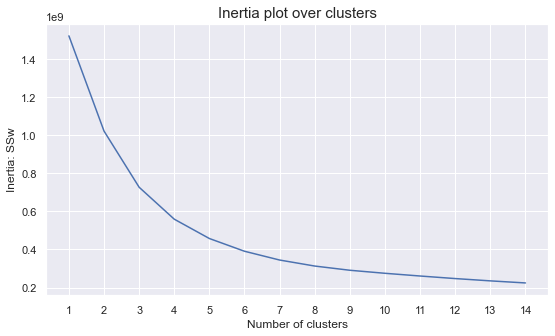

In [384]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.xticks(ticks=range(14) , labels = range_clusters)
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [385]:
premiumns_feat=['PremMotor','PremHousehold','PremHealth','PremLife','PremWork','CustMonVal']

In [386]:
premiums = filled_df[premiumns_feat]
premiums.head()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  CustMonVal
0     379.96         154.45      148.47     54.01     28.89      380.97
1      81.57         491.20      118.80    201.48    118.13     -131.13
2     210.26         299.50      126.69     93.35    111.02      504.67
3     186.59         118.35      313.28     42.34     40.34      -16.99
4     342.73         122.80      184.70     25.78     53.45       35.23

In [387]:
premiums.corr()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
PremMotor       1.000000      -0.651005   -0.628948 -0.656343 -0.645638   
PremHousehold  -0.651005       1.000000    0.094456  0.415958  0.407813   
PremHealth     -0.628948       0.094456    1.000000  0.094371  0.093363   
PremLife       -0.656343       0.415958    0.094371  1.000000  0.382642   
PremWork       -0.645638       0.407813    0.093363  0.382642  1.000000   
CustMonVal     -0.062043       0.294721   -0.102286  0.032493  0.045856   

               CustMonVal  
PremMotor       -0.062043  
PremHousehold    0.294721  
PremHealth      -0.102286  
PremLife         0.032493  
PremWork         0.045856  
CustMonVal       1.000000

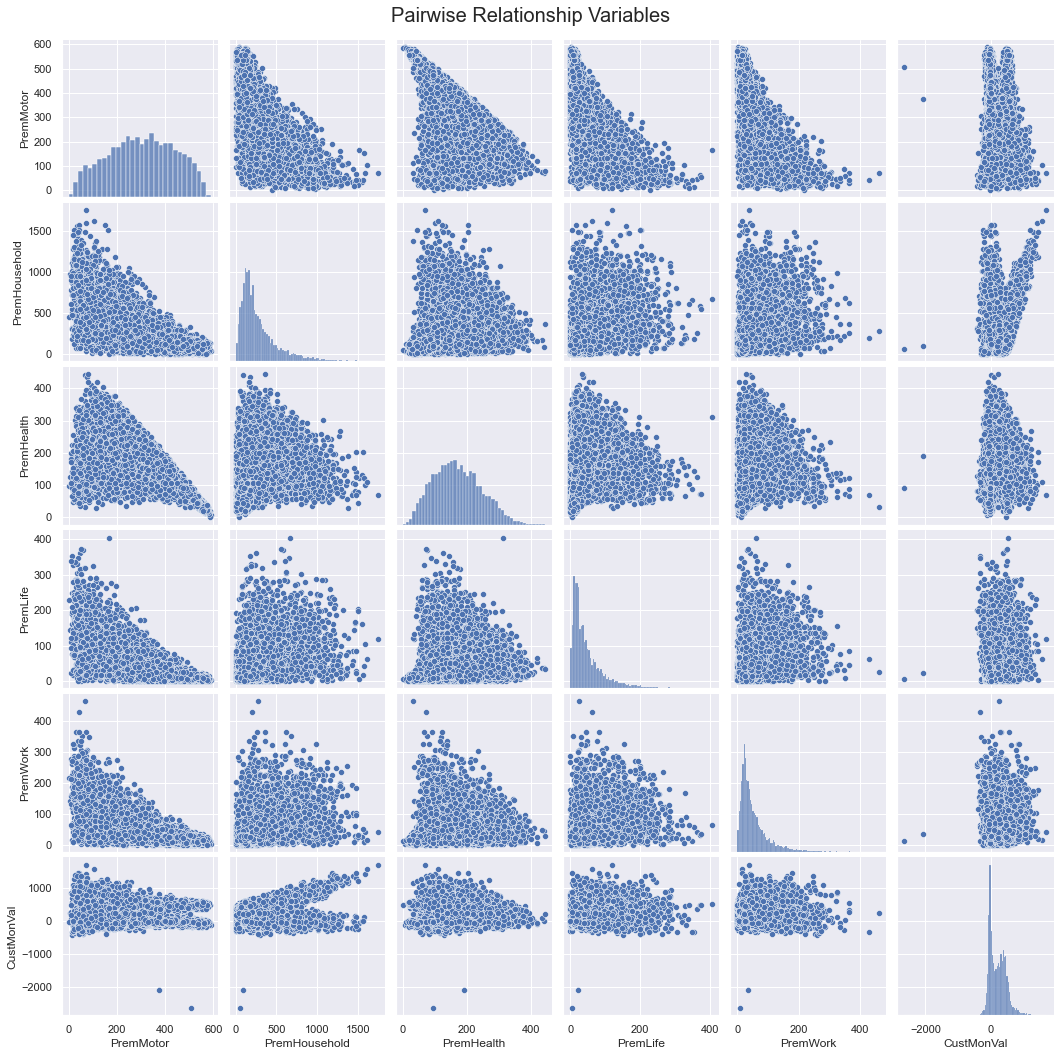

In [388]:
# # Pairwise Relationship of Numerical Variables
sns.set()

# # Setting pairplot
sns.pairplot(premiums,diag_kind="hist")

# # Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship Variables", fontsize=20)

plt.show()

In [389]:
from sklearn.preprocessing import MinMaxScaler
scaler_premium = MinMaxScaler().fit(premiums)
indices=premiums.index
scaled_premiums = scaler_premium.transform(premiums)
scaled_premiums

array([[0.64473215, 0.08835307, 0.33366294, 0.13325931, 0.06232606,
        0.69372389],
       [0.13841142, 0.28099079, 0.26698429, 0.49711325, 0.25484866,
        0.57624039],
       [0.35677804, 0.17132887, 0.28471582, 0.23032322, 0.23950985,
        0.72210254],
       ...,
       [0.69187043, 0.11887192, 0.32442637, 0.04853195, 0.03643777,
        0.72656008],
       [0.32698149, 0.16369201, 0.45054723, 0.17493215, 0.26947555,
        0.66368886],
       [0.70960243, 0.09693381, 0.32217902, 0.03427091, 0.05369663,
        0.71271488]])

In [390]:
# Ex with K-Means

sse = []
n_clusters = 25

for k in range(1, n_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_premiums)
    sse.append(kmeans.inertia_)

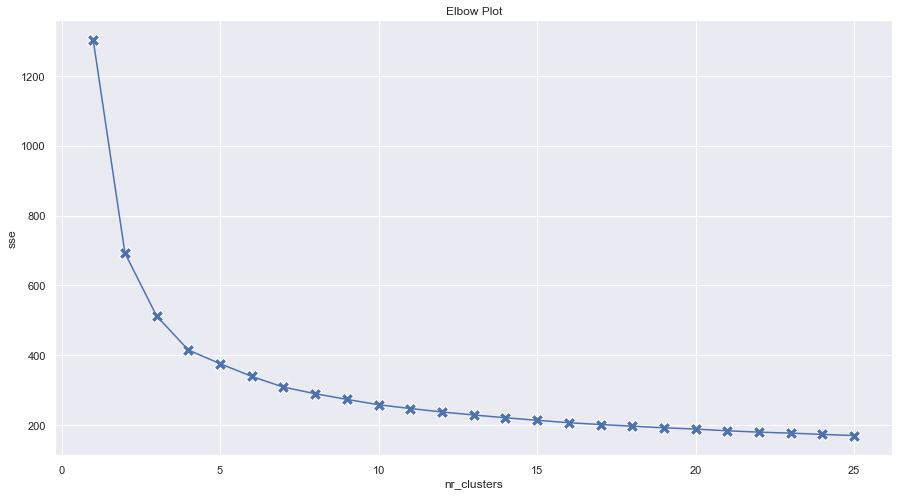

In [391]:
df_sse = pd.DataFrame({'nr_clusters': range(1, n_clusters + 1), 'sse': sse})

plt.figure(figsize = (15, 8))
sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
plt.title('Elbow Plot')
plt.show()

In [392]:
range_clusters = range(1, 10)

### Clustering k=10

In [394]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_premiums)
print(f"Total Error: {kmeans.inertia_}")

Total Error: 258.69104529877643


In [395]:
labels = kmeans.labels_
filled_df["premium_segmentation"] = labels

In [396]:
filled_df.head(1)

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0        1985.0     1982.0    2177.0      380.97        0.39     379.96   

   PremHousehold  PremHealth  PremLife  PremWork             EducDeg  \
0         154.45      148.47     54.01     28.89  b'2 - High School'   

  GeoLivArea Children  premium_segmentation  
0        1.0      1.0                     0

In [397]:
centroids = filled_df.groupby("premium_segmentation")[premiumns_feat].mean()
centroids

PremMotor  PremHousehold  PremHealth    PremLife  \
premium_segmentation                                                      
0                     416.689781     164.630807  125.535676   24.660552   
1                     144.757151     279.188351  302.562099   61.499029   
2                     246.346591     228.985327  247.826102   41.732120   
3                      95.899132     465.387838  155.462553  206.994925   
4                      82.485405     969.819656  131.350575  100.461885   
5                     101.461622     353.223724  154.275559  106.555222   
6                     267.212246     383.057583  146.122163   68.955826   
7                     338.707539     179.714839  188.001985   29.728304   
8                     146.548036     624.613464  216.248171   66.636913   
9                     507.625491     104.831055   68.016723   13.330645   

                        PremWork  CustMonVal  
premium_segmentation                          
0                      29.531684  208.808297  
1                      64.137067  137.894268  
2                      47.154124  163.095702  
3                      78.591772  208.816426  
4                     121.994934  499.189410  
5                     197.223405  140.796066  
6                      70.381378  255.050551  
7                      36.346147  182.472652  
8                      75.868010  344.405891  
9                      18.352662  216.549134

In [398]:
centroids = kmeans.cluster_centers_  
original_centroids = scaler_premium.inverse_transform(centroids) 
original_centroids

array([[416.80062383, 164.57627471, 125.48905723,  24.66009886,
         29.49013684, 208.9553486 ],
       [144.7571511 , 279.18835063, 302.56209919,  61.49902884,
         64.1370669 , 137.89426759],
       [246.388681  , 229.02985437, 247.74563384,  41.72016574,
         47.17914771, 163.23418169],
       [ 96.15934431, 465.71961078, 155.36209581, 206.7754491 ,
         78.59769461, 207.91107784],
       [ 82.48540541, 969.81965602, 131.35057494, 100.46188452,
        121.99493366, 499.18941032],
       [101.46162162, 353.22372372, 154.27555856, 106.55522222,
        197.22340541, 140.79606607],
       [267.37054696, 382.77504604, 146.12980939,  68.85738398,
         70.38615009, 255.5636372 ],
       [338.80584726, 179.71479714, 187.92463067,  29.71497852,
         36.35219272, 182.66857995],
       [146.53962132, 624.76465638, 216.13906872,  66.72668864,
         75.84042216, 343.75483871],
       [507.71276271, 104.73501695,  67.95759051,  13.31082237,
         18.34478983, 216.3

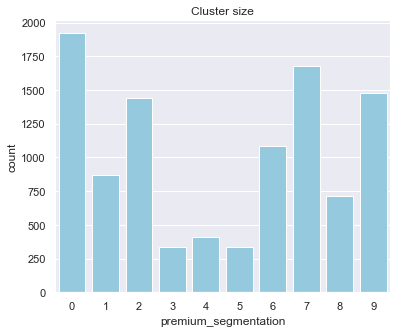

In [399]:
plt.figure(figsize = (6, 5))
sns.countplot(data=filled_df, x = 'premium_segmentation', color="skyblue")
plt.title("Cluster size")
plt.show()

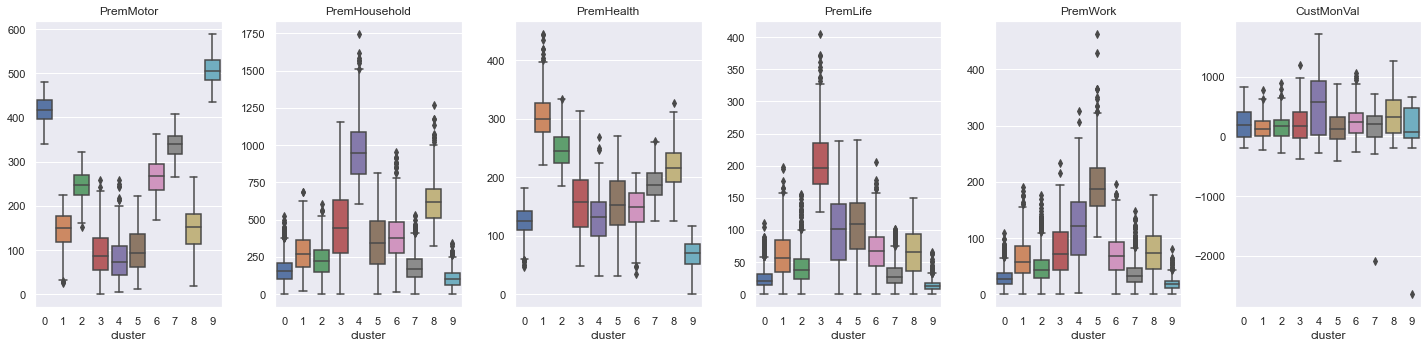

In [400]:
fig, ax = plt.subplots(nrows = 1, ncols = len(premiumns_feat), figsize = (20, 5))

for idx, c in enumerate(premiumns_feat):
    sns.boxplot(data = filled_df, x = 'premium_segmentation', y = c, ax = ax[idx])
    ax[idx].set_ylabel("")
    ax[idx].set_xlabel("cluster")
    ax[idx].set_title(c)
plt.tight_layout()
plt.show()

In [401]:
def outside_limit(df, label_col, label, sensitivity):
    feature_list = df_sem_norm.columns
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []
    dif_list=[]
    for i,varname in enumerate(feature_list):
    
   
        mean_overall = df[varname].mean()
        std_overall=  df[varname].std()
        n_overall= df[varname].shape[0]
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)


        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()


        #if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
        plot_list.append(varname)
        mean_overall_std = mean_overall/mean_overall
        mean_cluster_std = mean_cluster/mean_overall-1
        mean_overall_list.append(mean_overall_std)
        mean_cluster_list.append(mean_cluster_std)
   
    mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)

    return mean_df





def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
    
    
  
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

        for i,p in enumerate(ax.patches):
            ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
  
            ax.set_title('Unique Characteristics of Cluster ' + str(label))
            ax.set_xlabel('Standardized Mean')
            #x.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
  
    label = np.arange(n_clusters)
    for i in label:
        plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
    plt.tight_layout()

In [402]:
df_sem_norm=pd.DataFrame(scaled_premiums,columns=premiums.columns,index=indices)

In [403]:
df_sem_norm

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  CustMonVal
0       0.644732       0.088353    0.333663  0.133259  0.062326    0.693724
1       0.138411       0.280991    0.266984  0.497113  0.254849    0.576240
2       0.356778       0.171329    0.284716  0.230323  0.239510    0.722103
3       0.316614       0.067702    0.704047  0.104466  0.087028    0.602426
4       0.581559       0.070248    0.415084  0.063607  0.115311    0.614406
...          ...            ...         ...       ...       ...         ...
10290   0.018665       0.545449    0.236510  0.296126  0.460078    0.646760
10291   0.675089       0.071192    0.395352  0.041401  0.057774    0.606298
10293   0.691870       0.118872    0.324426  0.048532  0.036438    0.726560
10294   0.326981       0.163692    0.450547  0.174932  0.269476    0.663689
10295   0.709602       0.096934    0.322179  0.034271  0.053697    0.712715

[10255 rows x 6 columns]

In [404]:
len(scaled_premiums)

10255

In [405]:
len(filled_df)

10255

In [406]:
df_features=pd.concat([df_sem_norm,filled_df["premium_segmentation"]],axis=1)

In [407]:
df_features

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  CustMonVal  \
0       0.644732       0.088353    0.333663  0.133259  0.062326    0.693724   
1       0.138411       0.280991    0.266984  0.497113  0.254849    0.576240   
2       0.356778       0.171329    0.284716  0.230323  0.239510    0.722103   
3       0.316614       0.067702    0.704047  0.104466  0.087028    0.602426   
4       0.581559       0.070248    0.415084  0.063607  0.115311    0.614406   
...          ...            ...         ...       ...       ...         ...   
10290   0.018665       0.545449    0.236510  0.296126  0.460078    0.646760   
10291   0.675089       0.071192    0.395352  0.041401  0.057774    0.606298   
10293   0.691870       0.118872    0.324426  0.048532  0.036438    0.726560   
10294   0.326981       0.163692    0.450547  0.174932  0.269476    0.663689   
10295   0.709602       0.096934    0.322179  0.034271  0.053697    0.712715   

       premium_segmentation  
0                         0  
1                         3  
2                         6  
3                         1  
4                         7  
...                     ...  
10290                     4  
10291                     7  
10293                     0  
10294                     6  
10295                     0  

[10255 rows x 7 columns]

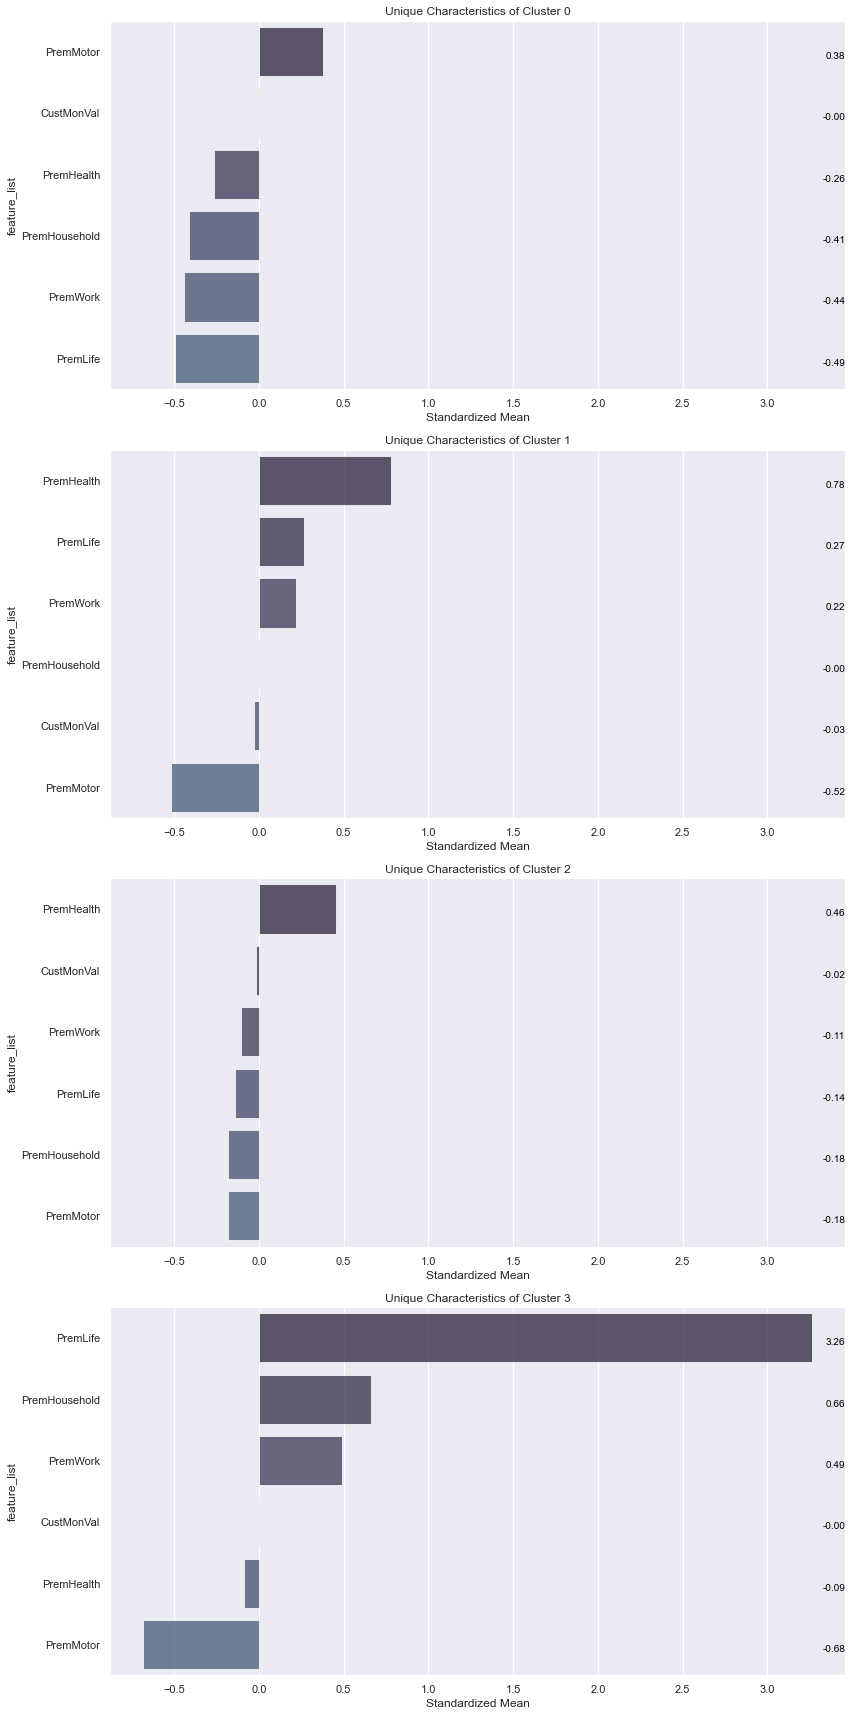

In [408]:
plot_features_all_cluster(df=df_features, label_col='premium_segmentation', n_clusters=4, sensitivity=0.001)

In [409]:
filled_df['GeoLivArea'].unique()

array([1.0, 4.0, 3.0, 2.0], dtype=object)

In [410]:
filled_df[(filled_df['GeoLivArea']!=1)&(filled_df['GeoLivArea']!=2)&(filled_df['GeoLivArea']!=3)&(filled_df['GeoLivArea']!=4)]
# The better thing is to throw away this observation 

Empty DataFrame
Columns: [FirstPolYear, BirthYear, MonthSal, CustMonVal, ClaimsRate, PremMotor, PremHousehold, PremHealth, PremLife, PremWork, EducDeg, GeoLivArea, Children, premium_segmentation]
Index: []

In [411]:
# filled_df.loc[296,'GeoLivArea']=2

#### check out the same ting happened with children ( for socio demographic segmentation we have to take careful , and solve this problem

In [412]:
filled_df[filled_df['premium_segmentation']==0]['BirthYear'].mean()

1965.0942187499998

In [413]:
filled_df['BirthYear'].max()

2001.0

In [414]:
filled_df[filled_df['premium_segmentation']==0]['FirstPolYear'].mean()

1986.1135416666664

In [415]:
filled_df[filled_df['premium_segmentation']==1]['FirstPolYear'].mean()

1985.9944636678201

In [416]:
filled_df[filled_df['premium_segmentation']==2]['FirstPolYear'].mean()

1986.2837969401949

In [417]:
filled_df[filled_df['premium_segmentation']==3]['FirstPolYear'].mean()

1985.8588588588589

### Distribution of Living Area Amongst the clusters

<AxesSubplot:>

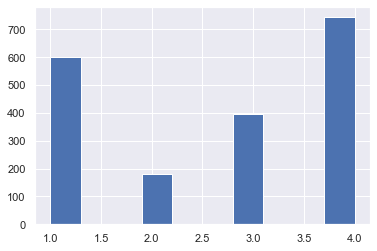

In [418]:
filled_df[filled_df['premium_segmentation']==0]['GeoLivArea'].hist()

<AxesSubplot:>

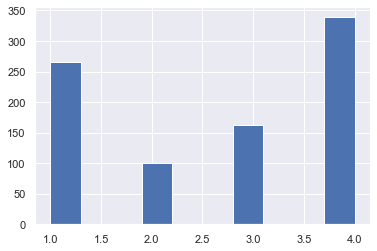

In [419]:
filled_df[filled_df['premium_segmentation']==1]['GeoLivArea'].hist()

<AxesSubplot:>

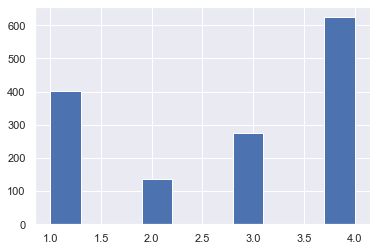

In [420]:
filled_df[filled_df['premium_segmentation']==2]['GeoLivArea'].hist()

<AxesSubplot:>

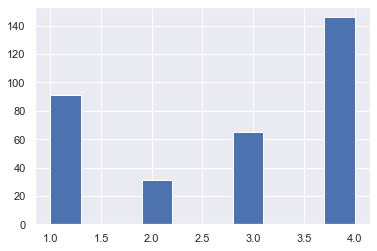

In [421]:
filled_df[filled_df['premium_segmentation']==3]['GeoLivArea'].hist()

In [422]:
filled_df

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0            1985.0     1982.0    2177.0      380.97        0.39     379.96   
1            1981.0     1995.0     677.0     -131.13        1.12      81.57   
2            1991.0     1970.0    2277.0      504.67        0.28     210.26   
3            1990.0     1981.0    1099.0      -16.99        0.99     186.59   
4            1986.0     1973.0    1763.0       35.23        0.90     342.73   
...             ...        ...       ...         ...         ...        ...   
10290        1994.0     1999.0     626.0      176.26        0.85      11.00   
10291        1984.0     1949.0    3188.0       -0.11        0.96     397.85   
10293        1994.0     1976.0    2918.0      524.10        0.21     407.74   
10294        1981.0     1977.0    1971.0      250.05        0.65     192.70   
10295        1990.0     1981.0    2815.0      463.75        0.27     418.19   

       PremHousehold  PremHealth  PremLife  PremWork             EducDeg  \
0             154.45      148.47     54.01     28.89  b'2 - High School'   
1             491.20      118.80    201.48    118.13  b'2 - High School'   
2             299.50      126.69     93.35    111.02        b'1 - Basic'   
3             118.35      313.28     42.34     40.34      b'3 - BSc/MSc'   
4             122.80      184.70     25.78     53.45      b'3 - BSc/MSc'   
...              ...         ...       ...       ...                 ...   
10290         953.50      105.24    120.02    213.26        b'1 - Basic'   
10291         124.45      175.92     16.78     26.78          b'4 - PhD'   
10293         207.80      144.36     19.67     16.89      b'3 - BSc/MSc'   
10294         286.15      200.48     70.90    124.91        b'1 - Basic'   
10295         169.45      143.36     13.89     24.89          b'4 - PhD'   

      GeoLivArea Children  premium_segmentation  
0            1.0      1.0                     0  
1            4.0      1.0                     3  
2            3.0      0.0                     6  
3            4.0      1.0                     1  
4            4.0      1.0                     7  
...          ...      ...                   ...  
10290        3.0      1.0                     4  
10291        2.0      0.0                     7  
10293        1.0      1.0                     0  
10294        2.0      1.0                     6  
10295        1.0      1.0                     0  

[10255 rows x 14 columns]

### HIERARCHICAL CLUSTERING PREMIUMS

In [423]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children', 'premium_segmentation'],
      dtype='object')

In [424]:

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram #centroids 




In [425]:
centroids=pd.DataFrame(centroids)
centroids

0         1         2         3         4         5
0  0.707245  0.094146  0.282017  0.060844  0.063621  0.654261
1  0.245630  0.159710  0.679961  0.151737  0.138367  0.637959
2  0.418083  0.131016  0.556769  0.102937  0.101782  0.643772
3  0.163167  0.266415  0.349152  0.510179  0.169563  0.654022
4  0.139965  0.554785  0.295190  0.247870  0.263187  0.720845
5  0.172164  0.202062  0.346710  0.262905  0.425481  0.638624
6  0.453686  0.218966  0.328404  0.169892  0.151848  0.664954
7  0.574900  0.102806  0.422331  0.073316  0.078425  0.648231
8  0.248655  0.357396  0.485739  0.164635  0.163615  0.685186
9  0.861508  0.059914  0.152724  0.032842  0.039576  0.655948

In [426]:
# Performing HC
hclust = AgglomerativeClustering(linkage='average', affinity='manhattan', n_clusters=5)
hc_labels = hclust.fit_predict(centroids) # CODE HERE
hc_labels

array([1, 0, 0, 4, 3, 2, 0, 1, 0, 1], dtype=int64)

In [427]:
# Computing SST
X = centroids.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True])

In [428]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1)) # CODE HERE
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        #get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        # Obtain SSB. Remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels) # CODE HERE SSB = SST - SSW
        
        # append the R2 of the given cluster solution
        r2.append(ssb / sst)# CODE HERE
        
    return np.array(r2)

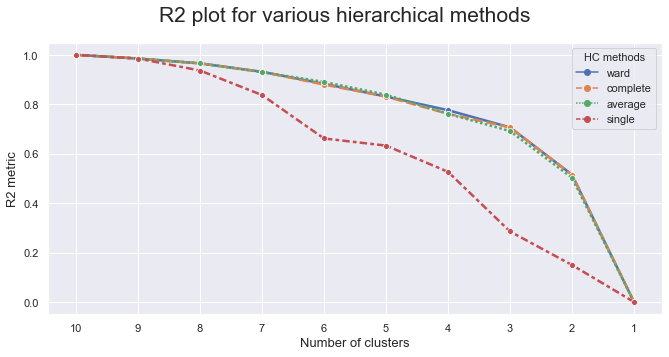

In [429]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]

# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=centroids, link_method=link, max_nclus=max_nclus) # CODE HERE 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [430]:
# Performing HC
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance,n_clusters=None,distance_threshold=0)
hclust.fit_predict(centroids)

array([9, 8, 6, 5, 7, 4, 3, 2, 1, 0], dtype=int64)

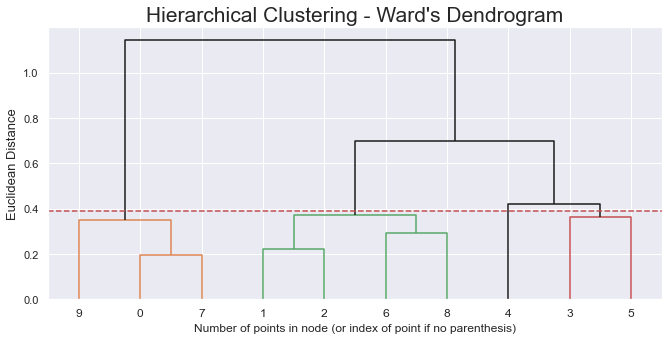

In [431]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 0.39
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [432]:
labels

array([0, 3, 6, ..., 0, 6, 0])

In [433]:
# 5 cluster solution
# linkage = 'ward'
# distance = 'euclidean'
hc3lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
hc3_results = hc3lust.fit_predict(centroids)

In [434]:
hc_results=np.zeros_like(labels)
for idx,clust in enumerate(labels):
    hc_results[idx]=hc3_results[clust]
hc_results

array([1, 0, 2, ..., 1, 2, 1])

In [435]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children', 'premium_segmentation'],
      dtype='object')

In [436]:
filled_df['premium_segmentation']=pd.Series(hc_results,name='premium_segmentation',index=filled_df.index)

In [437]:
premium_centroids=filled_df.groupby('premium_segmentation')['CustMonVal', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork'].mean()
premium_centroids

CustMonVal   PremMotor  PremHousehold  PremHealth  \
premium_segmentation                                                      
0                     297.848136   92.537457     621.914492  145.948253   
1                     202.356316  417.388909     152.205073  129.437460   
2                     213.624537  213.094623     349.111849  226.951080   

                        PremLife    PremWork  
premium_segmentation                          
0                     135.414898  131.871754  
1                      23.036849   28.529335  
2                      57.444351   61.880979

In [438]:
filled_df.groupby('premium_segmentation')['CustMonVal', 'PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork'].count()

CustMonVal  PremMotor  PremHousehold  PremHealth  \
premium_segmentation                                                     
0                           1073       1073           1073        1073   
1                           5076       5076           5076        5076   
2                           4106       4106           4106        4106   

                      PremLife  PremWork  
premium_segmentation                      
0                         1073      1073  
1                         5076      5076  
2                         4106      4106

In [439]:
filled_df['premium_segmentation'].value_counts()

1    5076
2    4106
0    1073
Name: premium_segmentation, dtype: int64

In [440]:
filled_df['premium_segmentation'].value_counts()

1    5076
2    4106
0    1073
Name: premium_segmentation, dtype: int64

## Segmentation BioDemographic - we'll start here today

In [442]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children', 'premium_segmentation'],
      dtype='object')

In [443]:
segmentation_biodemo=['GeoLivArea','Children','EducDeg','MonthSal','BirthYear']

In [444]:
costumerbiodemo = filled_df[segmentation_biodemo]

In [445]:
costumerbiodemo.corr()

MonthSal  BirthYear
MonthSal   1.000000  -0.787701
BirthYear -0.787701   1.000000

In [446]:
def make_educ(col):
    costumerbiodemo[col][costumerbiodemo[col]==costumerbiodemo['EducDeg'].unique()[0]]='Lower_Educ'
    costumerbiodemo[col][costumerbiodemo[col]==costumerbiodemo['EducDeg'].unique()[1]]='Lower_Educ'
    costumerbiodemo[col][costumerbiodemo[col]==costumerbiodemo['EducDeg'].unique()[2]]='Higher_Educ'
    costumerbiodemo[col][costumerbiodemo[col]==costumerbiodemo['EducDeg'].unique()[3]]='Higher_Educ'

In [447]:

print(costumerbiodemo['EducDeg'].unique())
costumerbiodemo['Children']=costumerbiodemo['Children'].apply(lambda x: 'Have' if x==1.0 else 'Dont Have')
costumerbiodemo['GeoLivArea']=costumerbiodemo['GeoLivArea'].astype(str)

#costumerbiodemo['EducDeg_grouped'] = costumerbiodemo['EducDeg'].apply(lambda x: make_educ('EducDeg'))
costumerbiodemo['EducDeg_grouped']=costumerbiodemo['EducDeg']
make_educ('EducDeg_grouped')
#costumerbiodemo['EducDeg'].astype(str)

#df['EducDeg'].unique()[0]


#costumerbiodemo['EducDeg_grouped']=costumerbiodemo['EducDeg_grouped'].apply(lambda x: 'Lower_Educ' if(x['EducDeg']==df['EducDeg'].unique()[0] or x['EducDeg']==df['EducDeg'].unique()[1]) else 'High_Educ')

[b'2 - High School' b'1 - Basic' b'3 - BSc/MSc' b'4 - PhD']


In [448]:
costumerbiodemo.drop('EducDeg',axis=1,inplace=True)

In [449]:
cat = costumerbiodemo[['GeoLivArea','Children','EducDeg_grouped']]
num = costumerbiodemo.drop(['GeoLivArea','Children','EducDeg_grouped'], axis=1)


In [450]:
costumerbiodemo.columns

Index(['GeoLivArea', 'Children', 'MonthSal', 'BirthYear', 'EducDeg_grouped'], dtype='object')

In [451]:
costumerbiodemo.head(3)

GeoLivArea   Children  MonthSal  BirthYear EducDeg_grouped
0        1.0       Have    2177.0     1982.0      Lower_Educ
1        4.0       Have     677.0     1995.0      Lower_Educ
2        3.0  Dont Have    2277.0     1970.0      Lower_Educ

In [452]:
# Scale
from sklearn.preprocessing import MinMaxScaler

scaler_biodemo = MinMaxScaler()

num_scaled = scaler_biodemo.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled, columns = num.columns, index = num.index)

In [453]:
costumerbiodemo=pd.concat([num_scaled,cat],axis=1)

In [454]:
catColumnsPos = [costumerbiodemo.columns.get_loc(col) for col in list(costumerbiodemo.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(costumerbiodemo.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['GeoLivArea', 'Children', 'EducDeg_grouped']
Categorical columns position  : [2, 3, 4]


In [455]:
costumerbiodemo

MonthSal  BirthYear GeoLivArea   Children EducDeg_grouped
0      0.033599   0.712121        1.0       Have      Lower_Educ
1      0.006268   0.909091        4.0       Have      Lower_Educ
2      0.035421   0.530303        3.0  Dont Have      Lower_Educ
3      0.013957   0.696970        4.0       Have     Higher_Educ
4      0.026056   0.575758        4.0       Have     Higher_Educ
...         ...        ...        ...        ...             ...
10290  0.005339   0.969697        3.0       Have      Lower_Educ
10291  0.052021   0.212121        2.0  Dont Have     Higher_Educ
10293  0.047101   0.621212        1.0       Have     Higher_Educ
10294  0.029846   0.636364        2.0       Have      Lower_Educ
10295  0.045224   0.696970        1.0       Have     Higher_Educ

[10255 rows x 5 columns]

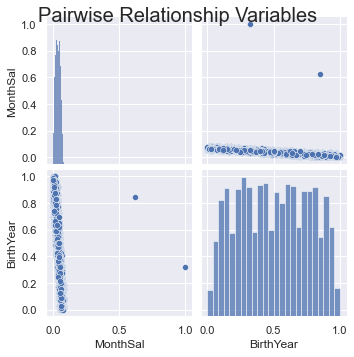

In [456]:
# # Pairwise Relationship of Numerical Variables
sns.set()

# # Setting pairplot
sns.pairplot(costumerbiodemo,diag_kind="hist")

# # Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship Variables", fontsize=20)

plt.show()

In [457]:
##### Remind then if its better to remove those 2 MonthSalary observations that could be outliers

In [458]:
from kmodes.kprototypes import KPrototypes
# Import module for k-protoype cluster
from kmodes.kmodes import KModes
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

In [459]:
dfMatrix = costumerbiodemo.to_numpy()
dfMatrix

array([[0.033599358623956854, 0.712121212121211, '1.0', 'Have',
        'Lower_Educ'],
       [0.006267993148937722, 0.9090909090909065, '4.0', 'Have',
        'Lower_Educ'],
       [0.0354214496556248, 0.5303030303030276, '3.0', 'Dont Have',
        'Lower_Educ'],
       ...,
       [0.047101053168616305, 0.6212121212121211, '1.0', 'Have',
        'Higher_Educ'],
       [0.029845851098720896, 0.6363636363636367, '2.0', 'Have',
        'Lower_Educ'],
       [0.04522429940599833, 0.6969696969696955, '1.0', 'Have',
        'Higher_Educ']], dtype=object)

In [460]:
catColumnsPos

[2, 3, 4]

2777.046900968678
Cluster initiation: 1
2034.7925356993287
Cluster initiation: 2
1503.996051439094
Cluster initiation: 3
1300.200912396767
Cluster initiation: 4
1136.3737718945986
Cluster initiation: 5
992.1299447794463
Cluster initiation: 6
881.1278010671033
Cluster initiation: 7
797.3698630791426
Cluster initiation: 8
708.4485092340856
Cluster initiation: 9


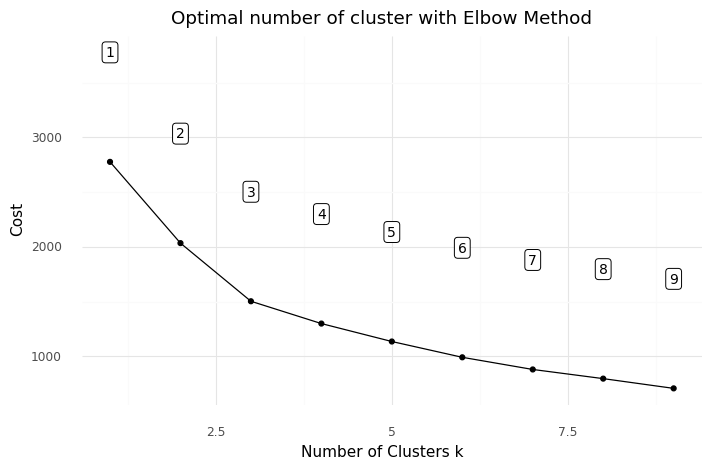

<ggplot: (87904909921)>

In [461]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Clustering K=3

In [462]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 2, 2, ..., 0, 2, 0], dtype=uint16)

In [463]:
# Cluster centorid
print(kprototype.cluster_centroids_)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[['0.03718113174667922' '0.5348562108335447' '1.0' 'Have' 'Higher_Educ']
 ['0.05894748153157566' '0.19684312148028787' '4.0' 'Dont Have'
  'Higher_Educ']
 ['0.02783495826477144' '0.691338772338759' '4.0' 'Have' 'Lower_Educ']]
6
1503.996051439094


In [464]:
# Add the cluster to the dataframe
filled_df['BioDemo_Segmentation'] = kprototype.labels_


In [465]:
costumerbiodemo.columns

Index(['MonthSal', 'BirthYear', 'GeoLivArea', 'Children', 'EducDeg_grouped'], dtype='object')

In [466]:
biodemo_scaled_centrois=pd.DataFrame(kprototype.cluster_centroids_,columns=costumerbiodemo.columns)
biodemo_scaled_centrois

MonthSal            BirthYear GeoLivArea   Children  \
0  0.03718113174667922   0.5348562108335447        1.0       Have   
1  0.05894748153157566  0.19684312148028787        4.0  Dont Have   
2  0.02783495826477144    0.691338772338759        4.0       Have   

  EducDeg_grouped  
0     Higher_Educ  
1     Higher_Educ  
2      Lower_Educ

In [467]:
filled_df.groupby("BioDemo_Segmentation")['MonthSal', 'BirthYear'].mean()

MonthSal    BirthYear
BioDemo_Segmentation                          
0                     2373.574873  1970.300510
1                     3568.155681  1947.991646
2                     1860.638179  1980.628359

In [468]:
biodemo_centrois=biodemo_scaled_centrois.copy()

In [469]:
biodemo_centrois['MonthSal']=filled_df.groupby("BioDemo_Segmentation")['MonthSal', 'BirthYear'].mean()['MonthSal']
biodemo_centrois['BirthYear']=filled_df.groupby("BioDemo_Segmentation")['MonthSal', 'BirthYear'].mean()['BirthYear']

In [470]:
biodemo_centrois

MonthSal    BirthYear GeoLivArea   Children EducDeg_grouped
0  2373.574873  1970.300510        1.0       Have     Higher_Educ
1  3568.155681  1947.991646        4.0  Dont Have     Higher_Educ
2  1860.638179  1980.628359        4.0       Have      Lower_Educ

In [471]:
costumerbiodemo.columns

Index(['MonthSal', 'BirthYear', 'GeoLivArea', 'Children', 'EducDeg_grouped'], dtype='object')

In [472]:
cat

GeoLivArea   Children EducDeg_grouped
0            1.0       Have      Lower_Educ
1            4.0       Have      Lower_Educ
2            3.0  Dont Have      Lower_Educ
3            4.0       Have     Higher_Educ
4            4.0       Have     Higher_Educ
...          ...        ...             ...
10290        3.0       Have      Lower_Educ
10291        2.0  Dont Have     Higher_Educ
10293        1.0       Have     Higher_Educ
10294        2.0       Have      Lower_Educ
10295        1.0       Have     Higher_Educ

[10255 rows x 3 columns]

In [473]:
costumerbiodemo['BioDemo_Segmentation'] = kprototype.labels_
costumerbiodemo.groupby(["BioDemo_Segmentation","EducDeg_grouped"]).size().unstack(fill_value=0)

EducDeg_grouped       Higher_Educ  Lower_Educ
BioDemo_Segmentation                         
0                            3040         490
1                            1781        1044
2                             669        3231

In [474]:
costumerbiodemo.groupby(["BioDemo_Segmentation","Children"]).size().unstack(fill_value=0)

Children              Dont Have  Have
BioDemo_Segmentation                 
0                           155  3375
1                          2436   389
2                           412  3488

In [475]:
costumerbiodemo.groupby(["BioDemo_Segmentation","GeoLivArea"]).size().unstack(fill_value=0)

GeoLivArea             1.0  2  2.0  3.0   4.0
BioDemo_Segmentation                         
0                     1762  0  407  816   545
1                      649  1  264  495  1416
2                      628  0  364  740  2168

In [476]:
filled_df.groupby(["GeoLivArea"])["MonthSal"].mean()

GeoLivArea
1.0    2475.346496
2.0    2563.284459
3.0    2482.192540
4.0    2529.941971
Name: MonthSal, dtype: float64

In [477]:
num_scaled

MonthSal  BirthYear
0      0.033599   0.712121
1      0.006268   0.909091
2      0.035421   0.530303
3      0.013957   0.696970
4      0.026056   0.575758
...         ...        ...
10290  0.005339   0.969697
10291  0.052021   0.212121
10293  0.047101   0.621212
10294  0.029846   0.636364
10295  0.045224   0.696970

[10255 rows x 2 columns]

In [478]:
df_features=costumerbiodemo.drop(['GeoLivArea','Children','EducDeg_grouped'],axis=1)

In [479]:
df_features

MonthSal  BirthYear  BioDemo_Segmentation
0      0.033599   0.712121                     2
1      0.006268   0.909091                     2
2      0.035421   0.530303                     2
3      0.013957   0.696970                     2
4      0.026056   0.575758                     0
...         ...        ...                   ...
10290  0.005339   0.969697                     2
10291  0.052021   0.212121                     1
10293  0.047101   0.621212                     0
10294  0.029846   0.636364                     2
10295  0.045224   0.696970                     0

[10255 rows x 3 columns]

In [480]:
def outside_limit(df, label_col, label, sensitivity):
    feature_list = num_scaled.columns
    plot_list = []
    mean_overall_list = []
    mean_cluster_list = []
    dif_list=[]
    for i,varname in enumerate(feature_list):
    
   
        mean_overall = df[varname].mean()
        std_overall=  df[varname].std()
        n_overall= df[varname].shape[0]
        lower_limit = mean_overall - (mean_overall*sensitivity)
        upper_limit = mean_overall + (mean_overall*sensitivity)


        cluster_filter = df[label_col]==label
        pd_cluster = df[cluster_filter]
        mean_cluster = pd_cluster[varname].mean()


        #if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
        plot_list.append(varname)
        mean_overall_std = mean_overall/mean_overall
        mean_cluster_std = mean_cluster/mean_overall-1
        mean_overall_list.append(mean_overall_std)
        mean_cluster_list.append(mean_cluster_std)
   
    mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
    mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)

    return mean_df





def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  
    mean_df = outside_limit(df, label_col, label, sensitivity)
    mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
    
    
  
    if len(mean_df.index) != 0:
        sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

        for i,p in enumerate(ax.patches):
            ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
  
            ax.set_title('Unique Characteristics of Cluster ' + str(label))
            ax.set_xlabel('Standardized Mean')
            #x.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
    n_plot = n_clusters
    fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
    ax= ax.ravel()
  
    label = np.arange(n_clusters)
    for i in label:
        plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
        ax[i].xaxis.set_tick_params(labelbottom=True)
    plt.tight_layout()

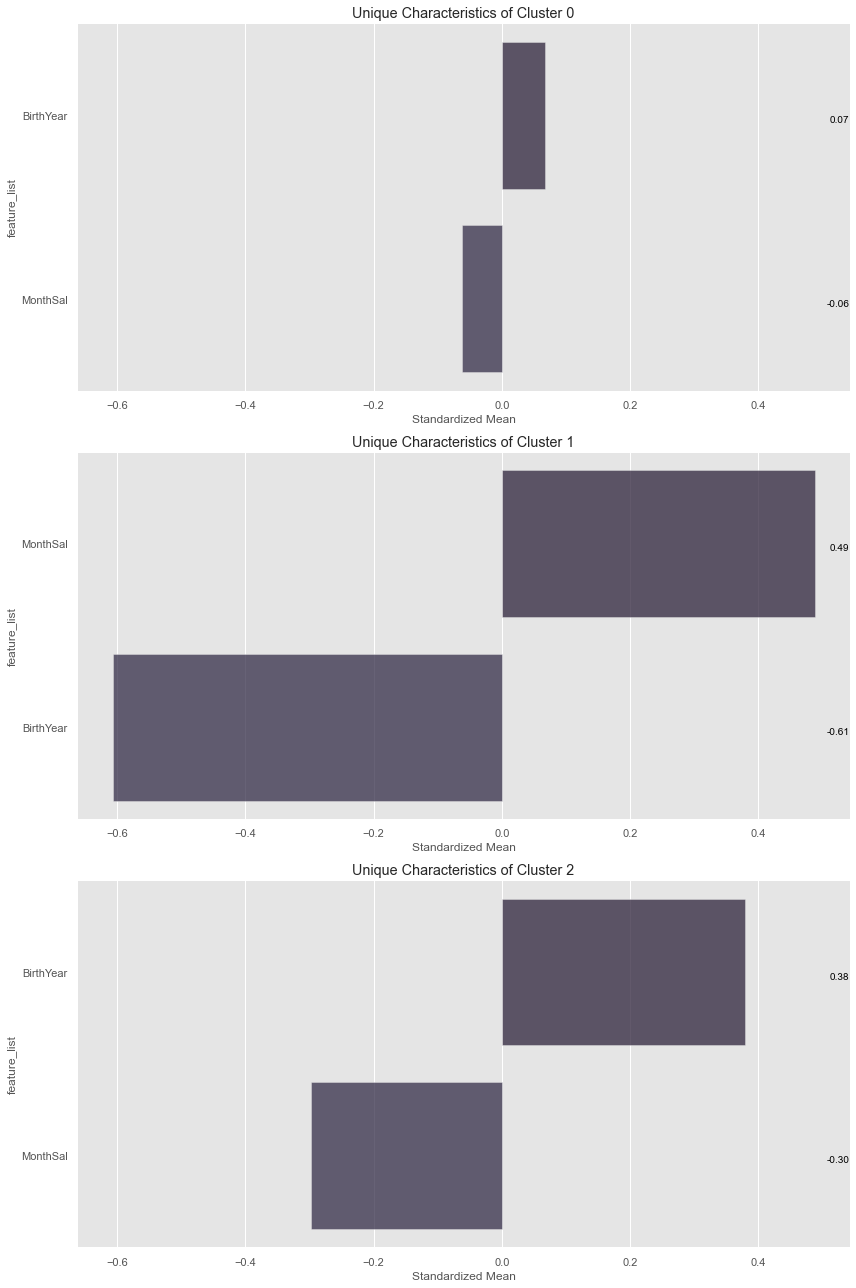

In [481]:
plot_features_all_cluster(df=df_features, label_col='BioDemo_Segmentation', n_clusters=3, sensitivity=0.001)

### CROSS-RESULTS

In [482]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children', 'premium_segmentation',
       'BioDemo_Segmentation'],
      dtype='object')

In [483]:
filled_df.groupby(['BioDemo_Segmentation','premium_segmentation']).mean()

FirstPolYear    BirthYear  \
BioDemo_Segmentation premium_segmentation                              
0                    0                      1987.211905  1979.690476   
                     1                      1985.926320  1968.545588   
                     2                      1986.040306  1974.725029   
1                    0                      1986.590909  1946.831061   
                     1                      1985.836283  1949.930973   
                     2                      1986.301727  1946.687588   
2                    0                      1985.882147  1992.060677   
                     1                      1985.796965  1973.154552   
                     2                      1986.133452  1980.805437   

                                              MonthSal  CustMonVal  \
BioDemo_Segmentation premium_segmentation                            
0                    0                     1917.273810  312.160595   
                     1                     2468.073102  205.458393   
                     2                     2130.456639  223.055828   
1                    0                     3591.409091  258.060379   
                     1                     3451.710531  193.626938   
                     2                     3650.378055  202.302022   
2                    0                     1274.940257  302.573617   
                     1                     2246.494078  203.699252   
                     2                     1849.203073  219.340296   

                                           ClaimsRate   PremMotor  \
BioDemo_Segmentation premium_segmentation                           
0                    0                       0.666310  130.116667   
                     1                       0.640374  436.885039   
                     2                       0.700917  234.393999   
1                    0                       0.707500  125.724477   
                     1                       0.667584  389.533586   
                     2                       0.721267  211.974479   
2                    0                       0.707398   83.742427   
                     1                       0.653819  403.239435   
                     2                       0.713316  203.416736   

                                           PremHousehold  PremHealth  \
BioDemo_Segmentation premium_segmentation                              
0                    0                        512.166071  154.441667   
                     1                        138.582755  117.315389   
                     2                        338.257286  215.278367   
1                    0                        486.661364  163.115076   
                     1                        167.023584  149.667673   
                     2                        329.054479  239.611886   
2                    0                        653.504084  142.471628   
                     1                        165.976351  135.800623   
                     2                        373.099379  221.126398   

                                             PremLife    PremWork  
BioDemo_Segmentation premium_segmentation                          
0                    0                     119.492143  121.941429  
                     1                      20.506948   25.764673  
                     2                      53.944031   58.773964  
1                    0                     134.541742  107.398409  
                     1                      25.517636   31.007572  
                     2                      54.108621   57.303194  
2                    0                     137.110077  136.614611  
                     1                      25.821308   31.766855  
                     2                      62.286265   67.672436

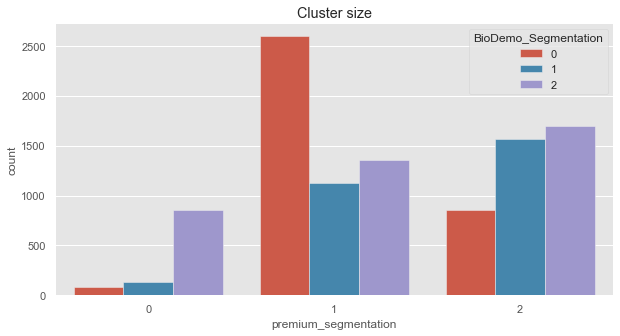

In [484]:
plt.figure(figsize = (10, 5))
sns.countplot(data=filled_df, x = 'premium_segmentation', hue="BioDemo_Segmentation")
plt.title("Cluster size")
plt.show()

In [485]:
pd.DataFrame(kprototype.cluster_centroids_)

0                    1    2          3            4
0  0.03718113174667922   0.5348562108335447  1.0       Have  Higher_Educ
1  0.05894748153157566  0.19684312148028787  4.0  Dont Have  Higher_Educ
2  0.02783495826477144    0.691338772338759  4.0       Have   Lower_Educ

### Merging the prespectives 

In [486]:
# Count label frequencies (contigency table)
filled_df.groupby(['premium_segmentation', 'BioDemo_Segmentation'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('BioDemo_Segmentation', 'premium_segmentation', 0)

premium_segmentation    0     1     2
BioDemo_Segmentation                 
0                      84  2595   851
1                     132  1130  1563
2                     857  1351  1692

In [487]:
from sklearn.metrics import pairwise_distances

In [488]:
filled_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children', 'premium_segmentation',
       'BioDemo_Segmentation'],
      dtype='object')

In [489]:
features=['PremMotor', 'PremHousehold',
       'PremHealth', 'PremLife', 'PremWork','BirthYear', 'MonthSal','CustMonVal']

In [490]:
# Clusters with low frequency to be merged:
to_merge = [(0,0), (1,0)]

df_centroids = filled_df.groupby(['BioDemo_Segmentation', 'premium_segmentation'])\
    [features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 0): (2, 2), (1, 0): (1, 2)}

In [491]:
df_ = filled_df.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['BioDemo_Segmentation']==source[0]) & (df_['premium_segmentation']==source[1])
    df_.loc[mask, 'BioDemo_Segmentation'] = target[0]
    df_.loc[mask, 'premium_segmentation'] = target[1]

# New contigency table
df_.groupby(['premium_segmentation', 'BioDemo_Segmentation'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('BioDemo_Segmentation', 'premium_segmentation', 0)

premium_segmentation      0       1       2
BioDemo_Segmentation                       
0                       NaN  2595.0   851.0
1                       NaN  1130.0  1695.0
2                     857.0  1351.0  1776.0

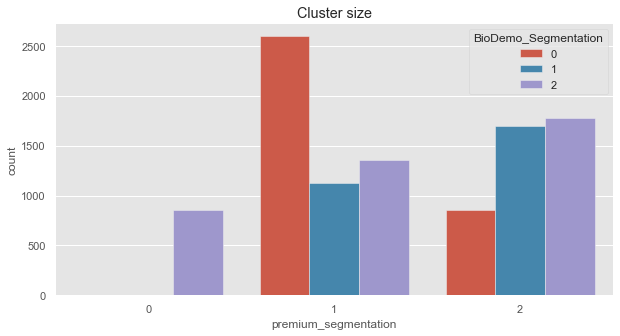

In [492]:
plt.figure(figsize = (10, 5))
sns.countplot(data=df_, x = 'premium_segmentation', hue="BioDemo_Segmentation")
plt.title("Cluster size")
plt.show()

In [493]:
df_.groupby(['premium_segmentation','BioDemo_Segmentation']).mean()

FirstPolYear    BirthYear  \
premium_segmentation BioDemo_Segmentation                              
0                    2                      1985.882147  1992.060677   
1                    0                      1985.926320  1968.545588   
                     1                      1985.836283  1949.930973   
                     2                      1985.796965  1973.154552   
2                    0                      1986.040306  1974.725029   
                     1                      1986.324248  1946.698761   
                     2                      1986.184459  1980.752703   

                                              MonthSal  CustMonVal  \
premium_segmentation BioDemo_Segmentation                            
0                    2                     1274.940257  302.573617   
1                    0                     2468.073102  205.458393   
                     1                     3451.710531  193.626938   
                     2                     2246.494078  203.699252   
2                    0                     2130.456639  223.055828   
                     1                     3645.785782  206.644265   
                     2                     1852.422635  223.730445   

                                           ClaimsRate   PremMotor  \
premium_segmentation BioDemo_Segmentation                           
0                    2                       0.707398   83.742427   
1                    0                       0.640374  436.885039   
                     1                       0.667584  389.533586   
                     2                       0.653819  403.239435   
2                    0                       0.700917  234.393999   
                     1                       0.720195  205.257665   
                     2                       0.711092  199.949841   

                                           PremHousehold  PremHealth  \
premium_segmentation BioDemo_Segmentation                              
0                    2                        653.504084  142.471628   
1                    0                        138.582755  117.315389   
                     1                        167.023584  149.667673   
                     2                        165.976351  135.800623   
2                    0                        338.257286  215.278367   
                     1                        341.328289  233.654612   
                     2                        379.676858  217.972390   

                                             PremLife    PremWork  
premium_segmentation BioDemo_Segmentation                          
0                    2                     137.110077  136.614611  
1                    0                      20.506948   25.764673  
                     1                      25.517636   31.007572  
                     2                      25.821308   31.766855  
2                    0                      53.944031   58.773964  
                     1                      60.372439   61.204415  
                     2                      64.991949   70.239213

In [494]:
df_.groupby(['premium_segmentation','BioDemo_Segmentation'])['EducDeg','GeoLivArea','Children'].agg(lambda x:x.value_counts().index[0])

EducDeg  GeoLivArea  \
premium_segmentation BioDemo_Segmentation                                   
0                    2                           b'1 - Basic'         4.0   
1                    0                         b'3 - BSc/MSc'         1.0   
                     1                         b'3 - BSc/MSc'         4.0   
                     2                     b'2 - High School'         4.0   
2                    0                         b'3 - BSc/MSc'         1.0   
                     1                         b'3 - BSc/MSc'         4.0   
                     2                     b'2 - High School'         4.0   

                                           Children  
premium_segmentation BioDemo_Segmentation            
0                    2                          1.0  
1                    0                          1.0  
                     1                          0.0  
                     2                          1.0  
2                    0                          1.0  
                     1                          0.0  
                     2                          1.0

In [495]:
df_.groupby(['premium_segmentation','BioDemo_Segmentation']).count()

FirstPolYear  BirthYear  MonthSal  \
premium_segmentation BioDemo_Segmentation                                      
0                    2                              857        857       857   
1                    0                             2595       2595      2595   
                     1                             1130       1130      1130   
                     2                             1351       1351      1351   
2                    0                              851        851       851   
                     1                             1695       1695      1695   
                     2                             1776       1776      1776   

                                           CustMonVal  ClaimsRate  PremMotor  \
premium_segmentation BioDemo_Segmentation                                      
0                    2                            857         857        857   
1                    0                           2595        2595       2595   
                     1                           1130        1130       1130   
                     2                           1351        1351       1351   
2                    0                            851         851        851   
                     1                           1695        1695       1695   
                     2                           1776        1776       1776   

                                           PremHousehold  PremHealth  \
premium_segmentation BioDemo_Segmentation                              
0                    2                               857         857   
1                    0                              2595        2595   
                     1                              1130        1130   
                     2                              1351        1351   
2                    0                               851         851   
                     1                              1695        1695   
                     2                              1776        1776   

                                           PremLife  PremWork  EducDeg  \
premium_segmentation BioDemo_Segmentation                                
0                    2                          857       857      857   
1                    0                         2595      2595     2595   
                     1                         1130      1130     1130   
                     2                         1351      1351     1351   
2                    0                          851       851      851   
                     1                         1695      1695     1695   
                     2                         1776      1776     1776   

                                           GeoLivArea  Children  
premium_segmentation BioDemo_Segmentation                        
0                    2                            857       857  
1                    0                           2595      2595  
                     1                           1130      1130  
                     2                           1351      1351  
2                    0                            851       851  
                     1                           1695      1695  
                     2                           1776      1776

In [567]:
final_centroids=pd.concat([df_.groupby(['premium_segmentation','BioDemo_Segmentation']).mean().round()
            ,df_.groupby(['premium_segmentation','BioDemo_Segmentation'])['EducDeg','GeoLivArea','Children'].agg(lambda x:x.value_counts().index[0])]
          ,axis=1)
final_centroids

FirstPolYear  BirthYear  MonthSal  \
premium_segmentation BioDemo_Segmentation                                      
0                    2                           1986.0     1992.0    1275.0   
1                    0                           1986.0     1969.0    2468.0   
                     1                           1986.0     1950.0    3452.0   
                     2                           1986.0     1973.0    2246.0   
2                    0                           1986.0     1975.0    2130.0   
                     1                           1986.0     1947.0    3646.0   
                     2                           1986.0     1981.0    1852.0   

                                           CustMonVal  ClaimsRate  PremMotor  \
premium_segmentation BioDemo_Segmentation                                      
0                    2                          303.0         1.0       84.0   
1                    0                          205.0         1.0      437.0   
                     1                          194.0         1.0      390.0   
                     2                          204.0         1.0      403.0   
2                    0                          223.0         1.0      234.0   
                     1                          207.0         1.0      205.0   
                     2                          224.0         1.0      200.0   

                                           PremHousehold  PremHealth  \
premium_segmentation BioDemo_Segmentation                              
0                    2                             654.0       142.0   
1                    0                             139.0       117.0   
                     1                             167.0       150.0   
                     2                             166.0       136.0   
2                    0                             338.0       215.0   
                     1                             341.0       234.0   
                     2                             380.0       218.0   

                                           PremLife  PremWork  \
premium_segmentation BioDemo_Segmentation                       
0                    2                        137.0     137.0   
1                    0                         21.0      26.0   
                     1                         26.0      31.0   
                     2                         26.0      32.0   
2                    0                         54.0      59.0   
                     1                         60.0      61.0   
                     2                         65.0      70.0   

                                                      EducDeg  GeoLivArea  \
premium_segmentation BioDemo_Segmentation                                   
0                    2                           b'1 - Basic'         4.0   
1                    0                         b'3 - BSc/MSc'         1.0   
                     1                         b'3 - BSc/MSc'         4.0   
                     2                     b'2 - High School'         4.0   
2                    0                         b'3 - BSc/MSc'         1.0   
                     1                         b'3 - BSc/MSc'         4.0   
                     2                     b'2 - High School'         4.0   

                                           Children  
premium_segmentation BioDemo_Segmentation            
0                    2                          1.0  
1                    0                          1.0  
                     1                          0.0  
                     2                          1.0  
2                    0                          1.0  
                     1                          0.0  
                     2                          1.0

## Clusters Analysis

Cluster 1: <br> 
-Youngest people <br>
-Lower salary <br>
-Most valuable clients <br>
-Spend more in Premium Household, spend some in the Health, Life and Work and spend less in Motor <br>
-The most comun education degree is Basic <br>
-The majority has childrens<br>

Clusters 2,3,4: <br>
-Spend more in motor <br>
-Spend some in Household and Health <br>
-Spend few in Life and Work <br>

Cluster 2(in detail): <br>
-Most comun Education Degree is HigherEduc <br>
-The have children <br>

Cluster 3 (in detail) : <br>
-Older people <br>
-Higher salary <br>
-Have no children <br>
-High Education <br>

Cluster 4: <br>
-Younger people (comparing with 2,3,4) <br>
-Have children <br>
-Most comun degree is highschool<br>

Cluster 5,6,7: <br>
-They spend most in Motor, Household and Health <br>
-Spend less in Life and Work <br>

Cluster 5: <br>
-Most comun Education Degree is HigherEduc <br>
-The have children <br>

Cluster 6 (in detail) : <br>
-Older people <br>
-Higher salary <br>
-Have no children <br>
-High Education <br>

Cluster 7: <br>
-Younger people (comparing with 2,3,4) <br>
-Have children <br>
-Most comun degree is highschool<br>

## Merging Outliers

### For Premium segmentation

In [497]:
scaled_premiums = scaler_premium.transform(df_outliers[premiumns_feat])

In [498]:
premium_centroids

CustMonVal   PremMotor  PremHousehold  PremHealth  \
premium_segmentation                                                      
0                     297.848136   92.537457     621.914492  145.948253   
1                     202.356316  417.388909     152.205073  129.437460   
2                     213.624537  213.094623     349.111849  226.951080   

                        PremLife    PremWork  
premium_segmentation                          
0                     135.414898  131.871754  
1                      23.036849   28.529335  
2                      57.444351   61.880979

In [499]:
pred_premium=KMeans(n_clusters=3).fit(premium_centroids).predict(scaled_premiums)

In [500]:
df_outliers['premium_segmentation']=pred_premium

### For BioDemo segmentation

In [501]:
segmentation_biodemo=['GeoLivArea','Children','EducDeg','MonthSal','BirthYear']
costumerbiodemo = df_outliers[segmentation_biodemo]

costumerbiodemo['Children']=costumerbiodemo['Children'].apply(lambda x: 'Have' if x==1.0 else 'Dont Have')
costumerbiodemo['GeoLivArea']=costumerbiodemo['GeoLivArea'].astype(str)
costumerbiodemo['EducDeg_grouped']=costumerbiodemo['EducDeg']
make_educ('EducDeg_grouped')
costumerbiodemo.drop('EducDeg',axis=1,inplace=True)

cat = costumerbiodemo[['GeoLivArea','Children','EducDeg_grouped']]
num = costumerbiodemo.drop(['GeoLivArea','Children','EducDeg_grouped'], axis=1)

num_scaled = scaler_biodemo.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled, columns = num.columns, index = num.index)
costumerbiodemo=pd.concat([num_scaled,cat],axis=1)

catColumnsPos = [costumerbiodemo.columns.get_loc(col) for col in list(costumerbiodemo.select_dtypes('object').columns)]

dfMatrix = costumerbiodemo.to_numpy()



In [502]:
pred_biodemo_outliers=kprototype.predict(dfMatrix, categorical = catColumnsPos)

In [503]:
df_outliers['BioDemo_Segmentation']=pred_biodemo_outliers

## Final

In [504]:
final_df=pd.concat([df_,df_outliers])

In [505]:
# New contigency table
final_df.groupby(['premium_segmentation', 'BioDemo_Segmentation'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('BioDemo_Segmentation', 'premium_segmentation', 0)

premium_segmentation    0     1     2
BioDemo_Segmentation                 
0                      14  2595   852
1                       1  1130  1695
2                     882  1351  1776

In [506]:
# Clusters with low frequency to be merged:
to_merge = [(0,0),(1,0)]

df_centroids = final_df.groupby(['BioDemo_Segmentation', 'premium_segmentation'])\
    [features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target



# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (final_df['BioDemo_Segmentation']==source[0]) & (final_df['premium_segmentation']==source[1])
    final_df.loc[mask, 'BioDemo_Segmentation'] = target[0]
    final_df.loc[mask, 'premium_segmentation'] = target[1]

# New contigency table
final_df.groupby(['premium_segmentation', 'BioDemo_Segmentation'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('BioDemo_Segmentation', 'premium_segmentation', 0)

premium_segmentation      0       1       2
BioDemo_Segmentation                       
0                       NaN  2596.0   852.0
1                       NaN  1130.0  1695.0
2                     896.0  1351.0  1776.0

In [507]:
final_df

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
0           1985.0     1982.0    2177.0      380.97        0.39     379.96   
1           1981.0     1995.0     677.0     -131.13        1.12      81.57   
2           1991.0     1970.0    2277.0      504.67        0.28     210.26   
3           1990.0     1981.0    1099.0      -16.99        0.99     186.59   
4           1986.0     1973.0    1763.0       35.23        0.90     342.73   
...            ...        ...       ...         ...         ...        ...   
917         1986.0     1952.0    3355.0   -26130.45       32.30     139.69   
982         1989.0     1981.0    1771.0    -6115.85        9.87      87.46   
9648        1990.0     1950.0    3574.0   -37327.08       69.00     323.17   
9294       53784.0     1948.0    3268.0      348.85        0.37     355.51   
7195        1993.0     1028.0    2830.0      146.02        0.77     433.08   

      PremHousehold  PremHealth  PremLife  PremWork             EducDeg  \
0            154.45      148.47     54.01     28.89  b'2 - High School'   
1            491.20      118.80    201.48    118.13  b'2 - High School'   
2            299.50      126.69     93.35    111.02        b'1 - Basic'   
3            118.35      313.28     42.34     40.34      b'3 - BSc/MSc'   
4            122.80      184.70     25.78     53.45      b'3 - BSc/MSc'   
...             ...         ...       ...       ...                 ...   
917          365.05      223.93     93.46    112.13  b'2 - High School'   
982          173.35      338.95     81.68    105.46  b'2 - High School'   
9648          49.45      247.49     11.89     16.78      b'3 - BSc/MSc'   
9294          90.00      189.48     29.45     29.78      b'3 - BSc/MSc'   
7195         267.80      111.02      8.89     35.67      b'3 - BSc/MSc'   

     GeoLivArea Children  premium_segmentation  BioDemo_Segmentation  
0           1.0      1.0                     1                     2  
1           4.0      1.0                     0                     2  
2           3.0      0.0                     2                     2  
3           4.0      1.0                     2                     2  
4           4.0      1.0                     1                     0  
...         ...      ...                   ...                   ...  
917         4.0      0.0                     0                     2  
982         3.0      1.0                     0                     2  
9648        3.0      0.0                     0                     2  
9294        1.0      0.0                     0                     2  
7195        4.0      0.0                     1                     0  

[10296 rows x 15 columns]

In [508]:
final_df.columns

Index(['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork',
       'EducDeg', 'GeoLivArea', 'Children', 'premium_segmentation',
       'BioDemo_Segmentation'],
      dtype='object')

In [511]:
final_df['merged_labels'] = final_df['premium_segmentation'].astype(str)+final_df['BioDemo_Segmentation'].astype(str)
final_df['merged_labels'].unique()

array(['12', '02', '22', '10', '21', '11', '20'], dtype=object)

In [513]:
final_df['merged_labels'][final_df['merged_labels']=='02']=1
final_df['merged_labels'][final_df['merged_labels']=='10']=2
final_df['merged_labels'][final_df['merged_labels']=='11']=3
final_df['merged_labels'][final_df['merged_labels']=='12']=4
final_df['merged_labels'][final_df['merged_labels']=='20']=5
final_df['merged_labels'][final_df['merged_labels']=='21']=6
final_df['merged_labels'][final_df['merged_labels']=='22']=7
final_df['merged_labels']

0       4
1       1
2       7
3       7
4       2
       ..
917     1
982     1
9648    1
9294    1
7195    2
Name: merged_labels, Length: 10296, dtype: object

In [560]:
final_df.drop(['premium_segmentation','BioDemo_Segmentation'],axis=1,inplace=True)

In [522]:
data=final_df[['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate',
       'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']]
target=final_df['merged_labels']

In [557]:
proj_2d = umap.UMAP(n_components=2,n_neighbors=50,min_dist=0.3 , random_state=0).fit_transform(data, y=target)
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=target, labels={'color': 'Clusters'}
)
fig_2d.show()

In [558]:
proj_3d = umap.UMAP(n_components=3,n_neighbors=50,min_dist=0.3 ,random_state=0 ).fit_transform(data, y=target)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=target, labels={'color': 'Clusters'}
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()